## Kaggel Competition: House Prices in Ames, Iowa 

In this notebook we will be using the Ames Housing dataset from Kaggle. The goal of this competition is to predict the final price of each home. 

### Ames, Iowa 

Ames is a city located in the central part of the state of Iowa in the United States. It is the county seat of Story County and has a population of approximately 66,000 people as of 2021.

Ames is home to Iowa State University, which is one of the largest universities in the state and one of the leading research institutions in the country. As a result, the city has a strong economy and a highly educated population.

The median household income in Ames is around $60,000 and the median home value is around $200,000. The city has a diverse economy, with major employers including Iowa State University, the federal government, and various manufacturing and technology companies. The cost of living in Ames is relatively low compared to other cities in the region, and the city has a relatively low unemployment rate. 

The city is known for its high quality of life, low cost of living, and strong sense of community. It has a well-developed park system, a thriving arts and culture scene, and a diverse range of restaurants and shops.

In addition, Ames is located in the heart of the Corn Belt, which means that it is surrounded by fertile farmland and has a strong agricultural heritage. The city is also located near several major highways, which makes it a convenient place to live and work.

### Housing Market - Ames, Iowa 

In order to predict the final price of each home, we need to know what factors affect the price of a home and to make sure that we have data for each of these factors. 

There are several factors that can affect house prices in Ames, Iowa, including:

1. Location: The location of a house is one of the most important factors that affects its price. Houses that are located in desirable neighborhoods, close to schools, shopping, and other amenities, are generally more expensive than those that are located in less desirable areas.

2. Size and features: The size and features of a house can also affect its price. Houses with more square footage, multiple bathrooms and bedrooms, and upgraded features such as granite countertops and stainless steel appliances are generally more expensive than those with fewer square feet and basic features.

3. Age: The age of a house can also affect its price. Older homes may have more character and charm, but they may also require more maintenance and upgrades, which can decrease their value.

4. Economic conditions: The overall health of the local economy can also affect house prices. When the economy is strong and there is a high demand for housing, prices tend to rise. Conversely, when the economy is weak and there is a low demand for housing, prices tend to fall.

5. Interest rates: Interest rates can also affect the affordability of housing, and therefore house prices. When interest rates are low, it is easier for people to obtain mortgages and purchase homes, which can drive up prices. Conversely, when interest rates are high, it is more difficult for people to obtain mortgages and purchase homes, which can drive down prices.

6. Supply and demand: Finally, the balance between supply and demand can also affect house prices. If there is a shortage of available homes and a high demand for housing, prices tend to rise. Conversely, if there is an excess of available homes and a low demand for housing, prices tend to fall.





During this notebook we used a few libraries that are not part of the standard Python distribution. These libraries are: 

1. googlemaps - googlemaps is a Python client for Google Maps and Google Places APIs Web Services. 

2. rich - rich is a Python library for rich text and beautiful formatting in the terminal. 

3. fredapi - fredapi is a Python library for the Federal Reserve Economic Data (FRED) API. 

4. xgboost - xgboost is a Python library for gradient boosting. 

5. lightgbm - lightgbm is a Python library for gradient boosting.

### Importing and Installing necessary libraries

In [1]:
!pip install -q googlemaps
!pip install -q rich
!pip install -q fredapi
!pip install -q xgboost
!pip install -q lightgbm
!pip install -q seaborn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train_ids_range = (train.Id[(train.Id.index[0])], train.Id[(train.Id.index[-1])])
print(f"IDs range for train data: {train_ids_range}")
test_ids_range = (test.Id[(test.Id.index[0])], test.Id[(test.Id.index[-1])])
print(f"IDs range for test data: {test_ids_range}")
df = train.append(test)
display(df)

IDs range for train data: (1, 1460)
IDs range for test data: (1461, 2919)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


## Features: 


SalePrice - the property's sale price in dollars. This is the target variable 
that you're trying to predict.

MSSubClass: The building class

MSZoning: The general zoning classification

LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access

Alley: Type of alley access

LotShape: General shape of property

LandContour: Flatness of the property

Utilities: Type of utilities available

LotConfig: Lot configuration

LandSlope: Slope of property

Neighborhood: Physical locations within Ames city limits

Condition1: Proximity to main road or railroad

Condition2: Proximity to main road or railroad (if a second is present)

BldgType: Type of dwelling

HouseStyle: Style of dwelling

OverallQual: Overall material and finish quality

OverallCond: Overall condition rating

YearBuilt: Original construction date

YearRemodAdd: Remodel date

RoofStyle: Type of roof

RoofMatl: Roof material

Exterior1st: Exterior covering on house

Exterior2nd: Exterior covering on house (if more than one material)

MasVnrType: Masonry veneer type

MasVnrArea: Masonry veneer area in square feet

ExterQual: Exterior material quality

ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation

BsmtQual: Height of the basement

BsmtCond: General condition of the basement

BsmtExposure: Walkout or garden level basement walls

BsmtFinType1: Quality of basement finished area

BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Quality of second finished area (if present)

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating

HeatingQC: Heating quality and condition

CentralAir: Central air conditioning

Electrical: Electrical system

1stFlrSF: First Floor square feet

2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Number of bedrooms above basement level

Kitchen: Number of kitchens

KitchenQual: Kitchen quality

TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality rating

Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

GarageType: Garage location

GarageYrBlt: Year garage was built

GarageFinish: Interior finish of the garage

GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

GarageCond: Garage condition

PavedDrive: Paved driveway

WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality

Fence: Fence quality

MiscFeature: Miscellaneous feature not covered in other categories

MiscVal: $Value of miscellaneous feature

MoSold: Month Sold

YrSold: Year Sold

SaleType: Type of sale

SaleCondition: Condition of sale


## Q: Which 3 features have the highest number of missing values

Answer: The 3 features with the highest number of missing values are PoolQC, MiscFeature, and Alley.

In [4]:
df.isna().sum().sort_values().tail(3)

Alley          2721
MiscFeature    2814
PoolQC         2909
dtype: int64

## Q: How the price behave over the years?

Answer: The price of the houses in Ames, Iowa has been increasing over the years. However, the price of the houses has been decreasing since 2008, we believe that this is due to the financial crisis of 2008. 

,YrSold,min,max,mean,std,median
0,2006,35311.0,625000.0,182549.458599,79426.838855,163995.0
1,2007,39300.0,755000.0,186063.151976,85768.171410,167000.0
2,2008,40000.0,446261.0,177360.838816,69735.610685,164000.0
3,2009,34900.0,582933.0,179432.103550,80879.237311,162000.0
4,2010,55000.0,611657.0,177393.674286,80451.280085,155000.0


<AxesSubplot: title={'center': 'SalePrice'}, xlabel='YrSold'>

(100000.0, 800000.0)

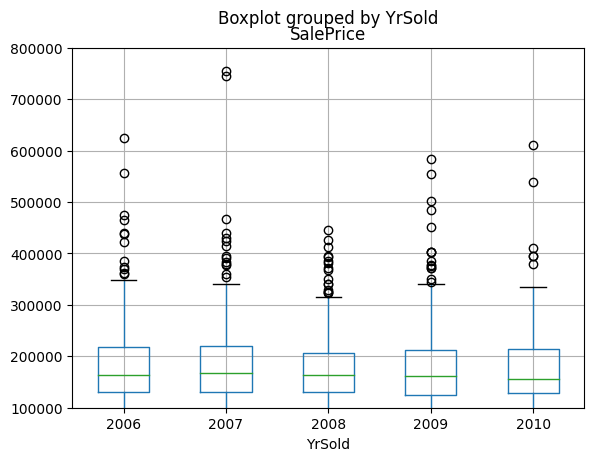

In [5]:
from matplotlib.pyplot import xlim


display(df.groupby('YrSold')['SalePrice'].agg(['min', 'max', 'mean', 'std', 'median']).reset_index());
# years = df.YrSold.unique().tolist()
# for year in years:
#     display(df[df.YrSold == year].groupby('YrSold')['SalePrice'].mean().plot.line(legend=True));
display(df.boxplot(column=['SalePrice'], by='YrSold'))
plt.ylim(100000, 800000)

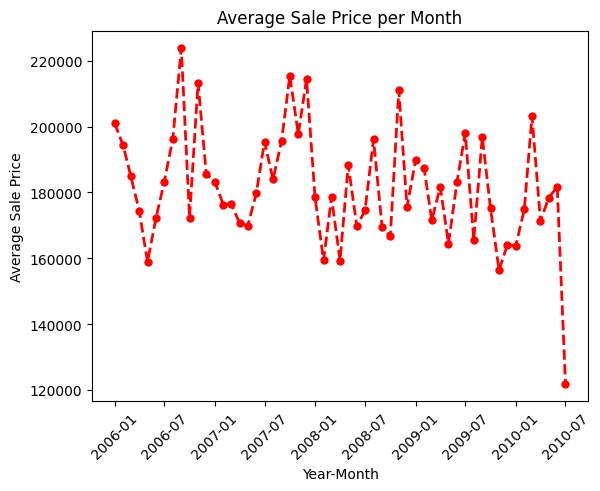

In [6]:
#plot the mean of the sale price by year sold and month sold
df["Year_Month_Sold"] = df["YrSold"].astype(str) + "-" + df["MoSold"].astype(str) 
df["Year_Month_Sold"] = pd.to_datetime(df["Year_Month_Sold"], format="%Y-%m") 
data_sale = df.groupby("Year_Month_Sold")["SalePrice"].mean().sort_index(ascending=True)
plt.plot(data_sale, color="red", marker="o", linestyle="dashed", linewidth=2, markersize=5)
df = df.drop("Year_Month_Sold", axis=1)
plt.title("Average Sale Price per Month") 
plt.xlabel("Year-Month")
plt.ylabel("Average Sale Price")
plt.xticks(rotation=45)
plt.show()

## Q: Plot the the feature distribution using histograms

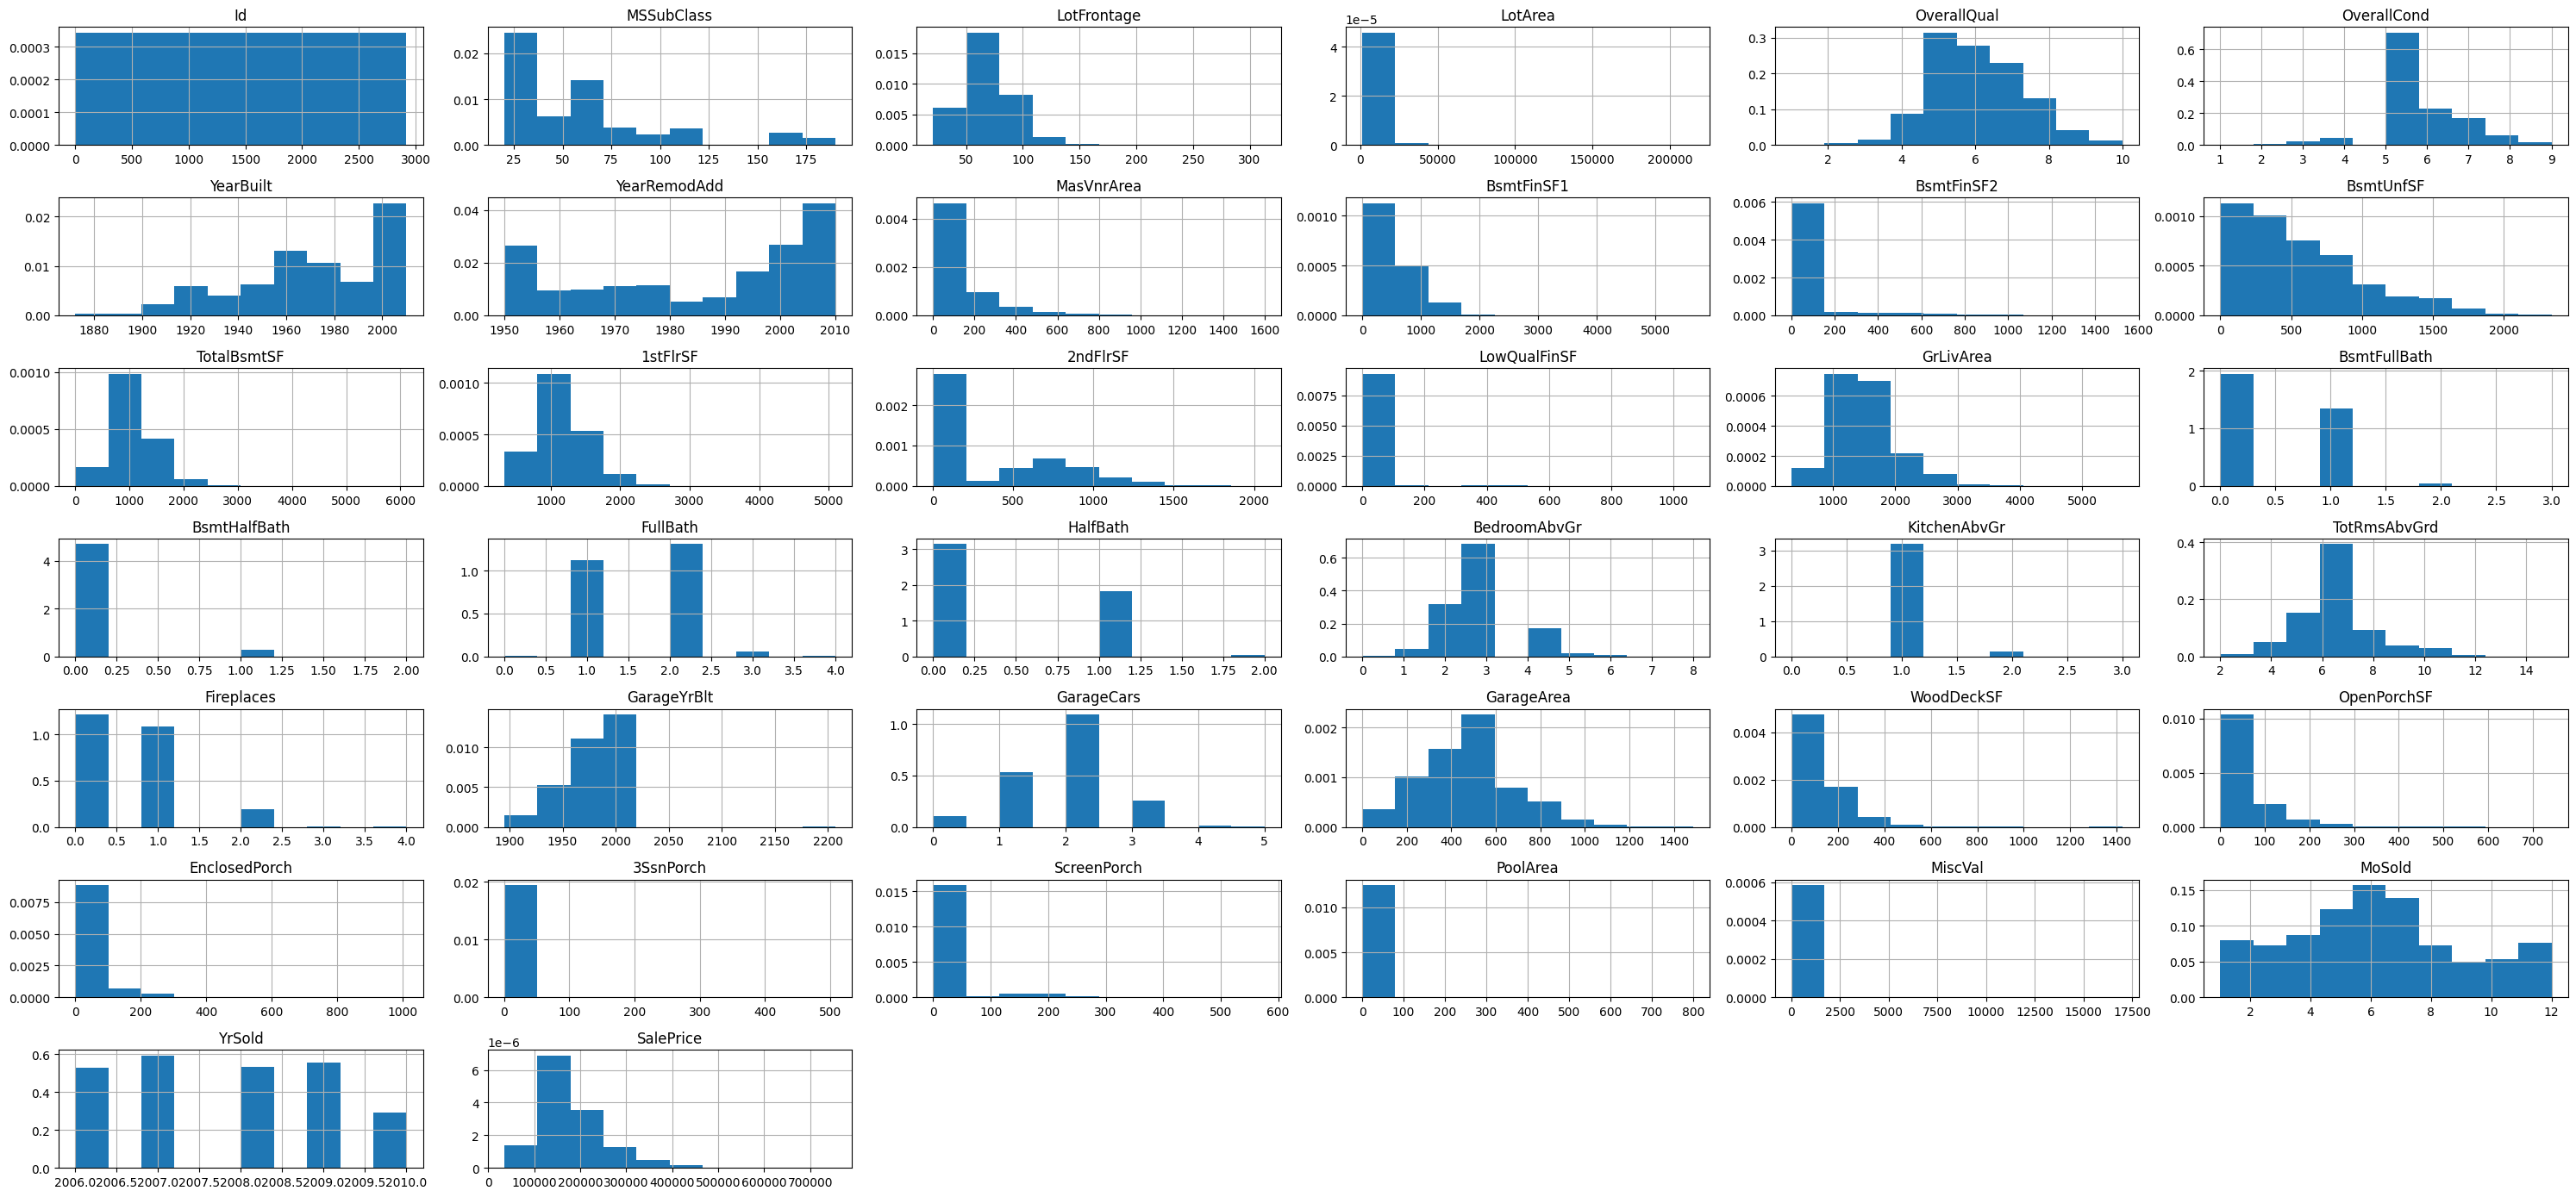

In [7]:
histograms = df[df._get_numeric_data().columns.to_list()].hist(figsize=(30,14), density=True)
plt.tight_layout()

## Q: Compute and order the features by their correlation with label

In [8]:
#used abs so the ordering would show correletaion mgnitude and not direction
corr = df.corr()[['SalePrice']].unstack().sort_values(ascending=False).abs()
corr.to_frame().reset_index().drop(columns='level_0')

,level_1,0
0,SalePrice,1.000000
1,OverallQual,0.790982
2,GrLivArea,0.708624
3,GarageCars,0.640409
4,GarageArea,0.623431
5,TotalBsmtSF,0.613581
6,1stFlrSF,0.605852
7,FullBath,0.560664
8,TotRmsAbvGrd,0.533723
9,YearBuilt,0.522897


Text(0, 0.5, 'Feature')

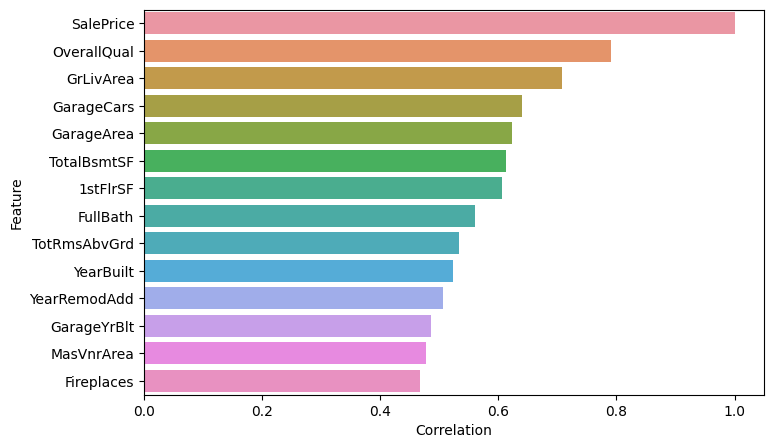

In [9]:
#features with the highest correlation to sale price plot 
highest_corr = corr[abs(corr) > 0.4].to_frame().reset_index().drop(columns='level_0')
plt.figure(figsize=(8,5))
sns.barplot(x=0, y='level_1', data=highest_corr)
plt.xlabel('Correlation')
plt.ylabel('Feature')

## EDA

In [10]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [11]:
#Get the list of all numeric columns 
numeric_columns = df._get_numeric_data().columns.to_list()

In [12]:
#Get the list of all categorial columns 
categorial_columns =  list(set(df.columns) - set(numeric_columns))

In [13]:
#Desribe the value distribution of categorial columns 
for category in categorial_columns:
  display(df[category].value_counts().to_frame())

,ExterCond
TA,2538
Gd,299
Fa,67
Ex,12
Po,3


,FireplaceQu
Gd,744
TA,592
Fa,74
Po,46
Ex,43


,PoolQC
Ex,4
Gd,4
Fa,2


,SaleCondition
Normal,2402
Partial,245
Abnorml,190
Family,46
Alloca,24
AdjLand,12


,LandSlope
Gtl,2778
Mod,125
Sev,16


,RoofStyle
Gable,2310
Hip,551
Gambrel,22
Flat,20
Mansard,11
Shed,5


,Neighborhood
NAmes,443
CollgCr,267
OldTown,239
Edwards,194
Somerst,182
NridgHt,166
Gilbert,165
Sawyer,151
NWAmes,131
SawyerW,125


,BsmtFinType2
Unf,2493
Rec,105
LwQ,87
BLQ,68
ALQ,52
GLQ,34


,Fence
MnPrv,329
GdPrv,118
GdWo,112
MnWw,12


,GarageQual
TA,2604
Fa,124
Gd,24
Po,5
Ex,3


,GarageFinish
Unf,1230
RFn,811
Fin,719


,HeatingQC
Ex,1493
TA,857
Gd,474
Fa,92
Po,3


,SaleType
WD,2525
New,239
COD,87
ConLD,26
CWD,12
ConLI,9
ConLw,8
Oth,7
Con,5


,Alley
Grvl,120
Pave,78


,RoofMatl
CompShg,2876
Tar&Grv,23
WdShake,9
WdShngl,7
Metal,1
Membran,1
Roll,1
ClyTile,1


,Functional
Typ,2717
Min2,70
Min1,65
Mod,35
Maj1,19
Maj2,9
Sev,2


,HouseStyle
1Story,1471
2Story,872
1.5Fin,314
SLvl,128
SFoyer,83
2.5Unf,24
1.5Unf,19
2.5Fin,8


,Foundation
PConc,1308
CBlock,1235
BrkTil,311
Slab,49
Stone,11
Wood,5


,LotConfig
Inside,2133
Corner,511
CulDSac,176
FR2,85
FR3,14


,PavedDrive
Y,2641
N,216
P,62


,MSZoning
RL,2265
RM,460
FV,139
RH,26
C (all),25


,Exterior1st
VinylSd,1025
MetalSd,450
HdBoard,442
Wd Sdng,411
Plywood,221
CemntBd,126
BrkFace,87
WdShing,56
AsbShng,44
Stucco,43


,LotShape
Reg,1859
IR1,968
IR2,76
IR3,16


,BsmtQual
TA,1283
Gd,1209
Ex,258
Fa,88


,Condition2
Norm,2889
Feedr,13
Artery,5
PosN,4
PosA,4
RRNn,2
RRAn,1
RRAe,1


,BsmtFinType1
Unf,851
GLQ,849
ALQ,429
Rec,288
BLQ,269
LwQ,154


,Condition1
Norm,2511
Feedr,164
Artery,92
RRAn,50
PosN,39
RRAe,28
PosA,20
RRNn,9
RRNe,6


,BsmtExposure
No,1904
Av,418
Gd,276
Mn,239


,Electrical
SBrkr,2671
FuseA,188
FuseF,50
FuseP,8
Mix,1


,GarageType
Attchd,1723
Detchd,779
BuiltIn,186
Basment,36
2Types,23
CarPort,15


,GarageCond
TA,2654
Fa,74
Gd,15
Po,14
Ex,3


,Exterior2nd
VinylSd,1014
MetalSd,447
HdBoard,406
Wd Sdng,391
Plywood,270
CmentBd,126
Wd Shng,81
BrkFace,47
Stucco,47
AsbShng,38


,ExterQual
TA,1798
Gd,979
Ex,107
Fa,35


,BldgType
1Fam,2425
TwnhsE,227
Duplex,109
Twnhs,96
2fmCon,62


,CentralAir
Y,2723
N,196


,MiscFeature
Shed,95
Gar2,5
Othr,4
TenC,1


,Utilities
AllPub,2916
NoSeWa,1


,Street
Pave,2907
Grvl,12


,Heating
GasA,2874
GasW,27
Grav,9
Wall,6
OthW,2
Floor,1


,LandContour
Lvl,2622
HLS,120
Bnk,117
Low,60


,KitchenQual
TA,1492
Gd,1151
Ex,205
Fa,70


,MasVnrType
None,1742
BrkFace,879
Stone,249
BrkCmn,25


,BsmtCond
TA,2606
Gd,122
Fa,104
Po,5


In [14]:
#Describe the distributions of numerical columns 
df[numeric_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


## Outliers 

from the description of the data we can see that there are outliers in the data, for example The year of GarageYrBlt is 2207, which is not possible, or the max of LotArea is 215245, which is very high compare to the mean of 10516.

In [15]:
def outliers(df, column):
    """
    This function takes a dataframe and a column name and returns a list of outliers
    """
    #Calculate the first and third quartile
    q1 = df[column].quantile(0.01)
    q3 = df[column].quantile(0.99)
    #Calculate the interquartile range
    iqr = q3 - q1
    #Calculate the lower and upper bounds
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    #Return the list of outliers
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    

In [16]:
#a function which returns an intersection of common values between two lists
def intersection(list1, list2):
    return [value for value in list1 if value in list2]

In [17]:
# Finding the columns which hold NaN values
nan_columns = [i for i in df.columns if df[i].isnull().any()]
nan_cat = intersection(nan_columns, categorial_columns)
nan_num = intersection(nan_columns, numeric_columns)
nan_num.remove('SalePrice') # removing target variable from NaNs list
print(f'Numeric columns with NaNs',nan_num)
print(f'Categorial columns with NaNs',nan_cat)

Numeric columns with NaNs ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea']
Categorial columns with NaNs ['MSZoning', 'Alley', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType']


In [18]:
#calculating mean, median, min, max and range of all numerical values, this would be then used to fill NaNs
#resutls are returned as list of tupples, each tupple represents a columns and consists of a columns name (str), the rate of the NaNs in the column,
# and a tupple which holds the values in this order:
# (mean, median, min, max, range)
import numpy as np

num_fill_values = []
for column in nan_num:
  mean = df[column].mean()
  min = df[column].min()
  max = df[column].max()
  median = df[column].median()
  range = max - min 
  nans_percent = round(df[column].isna().sum()/df[column].size,3)
  nans_count = df[column].isna().sum()
  num_fill_values.append((column,nans_percent, nans_count,(mean,median,min,max,range)))
for num_fill_value in num_fill_values:
  print(num_fill_value)

('LotFrontage', 0.166, 486, (69.30579531442663, 68.0, 21.0, 313.0, 292.0))
('MasVnrArea', 0.008, 23, (102.20131215469613, 0.0, 0.0, 1600.0, 1600.0))
('BsmtFinSF1', 0.0, 1, (441.4232350925291, 368.5, 0.0, 5644.0, 5644.0))
('BsmtFinSF2', 0.0, 1, (49.58224811514736, 0.0, 0.0, 1526.0, 1526.0))
('BsmtUnfSF', 0.0, 1, (560.7721041809458, 467.0, 0.0, 2336.0, 2336.0))
('TotalBsmtSF', 0.0, 1, (1051.7775873886224, 989.5, 0.0, 6110.0, 6110.0))
('BsmtFullBath', 0.001, 2, (0.429893726431265, 0.0, 0.0, 3.0, 3.0))
('BsmtHalfBath', 0.001, 2, (0.06136441549537196, 0.0, 0.0, 2.0, 2.0))
('GarageYrBlt', 0.054, 159, (1978.1134057971014, 1979.0, 1895.0, 2207.0, 312.0))
('GarageCars', 0.0, 1, (1.7666209732693625, 2.0, 0.0, 5.0, 5.0))
('GarageArea', 0.0, 1, (472.8745716244003, 480.0, 0.0, 1488.0, 1488.0))


We have 11 numerical colunms with NaNs

*   BsmtFinSF1
*   BsmtFinSF2
*   BsmtUnfSF
*   TotalBsmtSF
*   BsmtFullBath
*   BsmtHalfBath
*   GarageCars
*   GarageArea 

The ones above have only 1 or two missing values, and we beleive better to be dropped than filled. 
 

For MasVnrArea and GarageYrBlt - there are very few, less than 1 and 6 percent, respectively. We believe that for these two colunms it is also better to drop properties with missing values than to fill them (e.g. there is no logic in fillin a year of which a property was built).

For LotFrontage - we have about one 16% of missing data. Let's first check if we have zeros in the data, to understand if for properties which do not have street connection a zero is marked, if not, we can assume that a NaN means zero.

In [19]:
df["GarageYrBlt"].isna().sum()

159

Features MSZoning, Utilities, Exterior1st, Exterior2nd, Electrical, KitchenQual, Functional and SaleType had one or two missing values and there for their rows would be omitted for train rows, however, given that we cannot lose test data beacuse of the Kaggle limitation of uploading test set, we keep these rows and filled with 'None', after consulting with Lior. 

In [20]:
num_rows_to_drop = ['BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','BsmtFullBath','BsmtHalfBath','GarageCars','GarageArea', 'MasVnrArea', 'GarageYrBlt']
#drop the na rows from the train data but keep the na rows in the test data and fill them with them with 0 
train = df[(df.Id <= train_ids_range[1]) & (df.Id >= train_ids_range[0])]
test = df[(df.Id <= test_ids_range[1]) & (df.Id >= test_ids_range[0])]
print(f"Train data shape before dropping rows: {train.shape}")
print(f"Test data shape before dropping rows: {test.shape}")

#drop and fill 
for column in num_rows_to_drop:
  train.dropna(subset=[column], inplace=True)
  test.loc[test[column].isna(),column] = 0
  
cat_rows_to_drop = ['Electrical', 'MSZoning', 'Exterior1st', 'Exterior2nd', 'KitchenQual', 'Functional', 'SaleType']
for col in cat_rows_to_drop: 
  train = train.fillna({col: train[col].mode()[0]})
  test = test.fillna({col: test[col].mode()[0]})
  
#outliers in the train data
for col in train._get_numeric_data().columns.to_list():
  train = train.drop(outliers(train, col).index) 


print(f"Train data shape after dropping rows: {train.shape}") 
print(f"Test data shape after dropping rows: {test.shape}")
  

Train data shape before dropping rows: (1460, 81)
Test data shape before dropping rows: (1459, 81)
Train data shape after dropping rows: (1343, 81)
Test data shape after dropping rows: (1459, 81)


As we can see, 21 feet are the minimal length of street connection. We will fill these missing values with zero, assunming that it means these properties have no street connection. 
we will fill the NaNs with the mean, BUT, in order to avoide leakage between test and train, we will fill train and test NaNs with the respected mean value. 

In [21]:
train_median = train["LotFrontage"].median()
test_median = test["LotFrontage"].median()

train.loc[train["LotFrontage"].isna(),"LotFrontage"] = train_median
test.loc[test["LotFrontage"].isna(),"LotFrontage"] = test_median

In [22]:
df = pd.concat([train,test], axis=0)

In [23]:
#finding the most common and rare value per categorial column which hold NaN values
#results are returned as a list of tupples, each tupple represents a column and consists of a column name (str), the rate of the NaNs in the column,
#and tupple which hold values in this order:
# (cmmon value, rare value)
cat_fill_values = []
for column in nan_cat:
  common = df[column].mode()[0]
  rare = df[column].value_counts().tail(1).index[0]
  nans_percent = round(df[column].isna().sum()/df[column].size,2)
  nans_count = df[column].isna().sum()
  cat_fill_values.append((column,nans_count, nans_percent, (common,rare)))
cat_fill_values

[('MSZoning', 0, 0.0, ('RL', 'RH')),
 ('Alley', 2615, 0.93, ('Grvl', 'Pave')),
 ('Utilities', 2, 0.0, ('AllPub', 'NoSeWa')),
 ('Exterior1st', 0, 0.0, ('VinylSd', 'AsphShn')),
 ('Exterior2nd', 0, 0.0, ('VinylSd', 'Other')),
 ('MasVnrType', 16, 0.01, ('None', 'BrkCmn')),
 ('BsmtQual', 74, 0.03, ('TA', 'Fa')),
 ('BsmtCond', 75, 0.03, ('TA', 'Po')),
 ('BsmtExposure', 75, 0.03, ('No', 'Mn')),
 ('BsmtFinType1', 72, 0.03, ('GLQ', 'LwQ')),
 ('BsmtFinType2', 73, 0.03, ('Unf', 'GLQ')),
 ('Electrical', 0, 0.0, ('SBrkr', 'Mix')),
 ('KitchenQual', 0, 0.0, ('TA', 'Fa')),
 ('Functional', 0, 0.0, ('Typ', 'Sev')),
 ('FireplaceQu', 1337, 0.48, ('Gd', 'Po')),
 ('GarageType', 76, 0.03, ('Attchd', 'CarPort')),
 ('GarageFinish', 78, 0.03, ('Unf', 'Fin')),
 ('GarageQual', 78, 0.03, ('TA', 'Ex')),
 ('GarageCond', 78, 0.03, ('TA', 'Ex')),
 ('PoolQC', 2799, 1.0, ('Ex', 'Gd')),
 ('Fence', 2258, 0.81, ('MnPrv', 'MnWw')),
 ('MiscFeature', 2710, 0.97, ('Shed', 'Gar2')),
 ('SaleType', 0, 0.0, ('WD', 'Oth'))]

*   Alley, PoolQC and MiscFeature have more than 93% NaN values, and there for would be all omitted. 

*   FireplaceQu has about half of missing values, it describes the quality of the fireplace. In the cell below - let's see the nature of this feature and it's related features. 

*  Fence has ~80% missing values, we'll analize it upon Fireplaces. 



In [24]:
# df.drop(columns=['Alley', 'PoolQC', 'MiscFeature'], inplace=True, axis=1) #drop columns with a lot of NaNs

for col in ('PoolQC','MiscFeature','GarageType','Alley','Fence','FireplaceQu','GarageFinish', 'GarageQual', 'GarageCond','MasVnrType','MSSubClass'):
    df[col] = df[col].fillna('None')
    
#drop the utilities column as it has only few value 
df.drop(columns=['Utilities'], inplace=True, axis=1)

In [25]:
print(f"Number of missing values for properties with fireplaces: {df[df['Fireplaces']!=0]['FireplaceQu'].isna().sum()}")
print(f"Mean number of fireplaces per propertiy {round(df[df['Fireplaces'] != 0]['Fireplaces'].mean(),2)}")
print(f"Percentage of properties with more than one fireplace {round(df[df['Fireplaces'] > 1]['Fireplaces'].size/ df[df['Fireplaces']>0]['Fireplaces'].size * 100,2)}%")

Number of missing values for properties with fireplaces: 0
Mean number of fireplaces per propertiy 1.16
Percentage of properties with more than one fireplace 14.81%


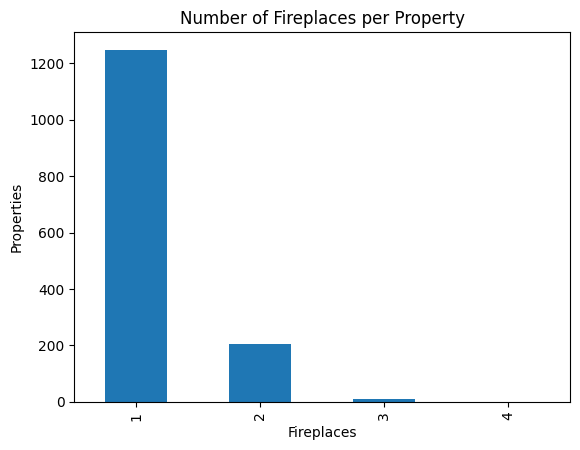

In [26]:
df[df['Fireplaces']>0]['Fireplaces'].value_counts().plot.bar(title='Number of Fireplaces per Property', ylabel='Properties', xlabel='Fireplaces');

As we can see, there are no real missing values for this feature, because in case there are Fireplaces, there is a report about their quality. Therefore, instead of filling the missing values, we will generate a new feature, combining both colunms of fireplaces. 
We do need to remember, that we have only one report per property, so we would have to assume that in cases there are more than one fireplace in one property, all of them have the same quality. In the scope of this task, we believe it's ok, mainly because we do not have many properties with more than one fireplace (~15% out of the ones with fireplace). 

In [27]:
df['Fireplaces_status'] = np.where(df['Fireplaces'] > 0, df['FireplaceQu'], 'No_FirePlace')
# dummies.append('Fireplaces_status')
df.drop(columns=['Fireplaces', 'FireplaceQu'], inplace=True)
categorial_columns.remove('FireplaceQu')
numeric_columns.remove('Fireplaces')

In [28]:
display(df.Fence.value_counts().to_frame())
print(f"Number of NaNs in Fence feature {df.Fence.isna().sum()}")

,Fence
None,2258
MnPrv,313
GdPrv,111
GdWo,108
MnWw,12


Number of NaNs in Fence feature 0


As written in the data documentation, the NaNs in Fence, are reffering to properties with no Fence. 
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
We will fill the missing values with "no_fence" like we did for fireplaces.

In [29]:
df['Fence_status'] = np.where(df['Fence'].isna(), 'no_fence', df['Fence'])
df.drop(columns=['Fence'], inplace=True, axis=1)
categorial_columns.remove('Fence')

These features has 3-5% missing values, and we believe are better to be filled than omitted. Let's see what each means:

**MasVnrType** - the type of Masonry veneer, a NaN means there isn't any. 

  **Would be field with 'None'.** 

**Basement features:** 
 **BsmtQual** - Height of the basement.

 **BsmtCond** - General condition of the basement.

 **BsmtExposure** - Walkout or garden level basement walls.
 
 **BsmtFinType1** - Quality of basement finished area.

 **BsmtFinType2** - Quality of second finished area (if present).

 **all Would be field with 'None'.** 
 Also, a new column based on these would be added indicateing there is no basement

**Garage features:** 
 **GarageType** - Garage location.

 **GarageFinish** - Interior finish of the garage.

 **GarageQual** - Garage quality.

 **GarageCond** - Garage condition.

 **all Would be field with 'None'.**  Also, a new column based on these would be added indicateing there is no garage


In [30]:
cat_bsmt_to_fill = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']
cat_garage_to_fill = ['GarageFinish', 'GarageQual', 'GarageCond', 'GarageType']


conditions_bsmt = [(df['BsmtQual'].notna()) | (df['BsmtCond'].notna()) | (df['BsmtExposure'].notna()) | (df['BsmtFinType1'].notna()) | (df['BsmtFinType2'].notna()), 
                   (df['BsmtQual'].isna()) & (df['BsmtCond'].isna()) & (df['BsmtExposure'].isna()) & (df['BsmtFinType1'].isna()) & (df['BsmtFinType2'].isna())]
values = [1,0]
df['HasBsmt'] = np.select(conditions_bsmt, values)
for col in cat_bsmt_to_fill:
  df[col].fillna('No_Basement', inplace=True)

conditions_garage = [(df['GarageFinish'].notna()) | (df['GarageQual'].notna()) | (df['GarageCond'].notna()) | (df['GarageType'].notna()),
                     (df['GarageFinish'].isna()) & (df['GarageQual'].isna()) & (df['GarageCond'].isna()) & (df['GarageType'].isna())]
values = [1,0]
df['HasGarage'] = np.select(conditions_garage, values)
for col in cat_garage_to_fill:
  df[col].fillna('No_Garage', inplace=True)

In [31]:
df.isna().sum().sort_values(ascending=False).head(10)

SalePrice       1459
Id                 0
KitchenAbvGr       0
GarageCars         0
GarageFinish       0
GarageYrBlt        0
GarageType         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
dtype: int64

## Given that all categorial values which contain NaNs were either removed or filled in an feature engineering way, we would not use the common/rare values we calculated before. 

Converting all categorial features into dummies

In [32]:
numeric_columns = df._get_numeric_data().columns.to_list()
categorial_columns =  list(set(df.columns) - set(numeric_columns))

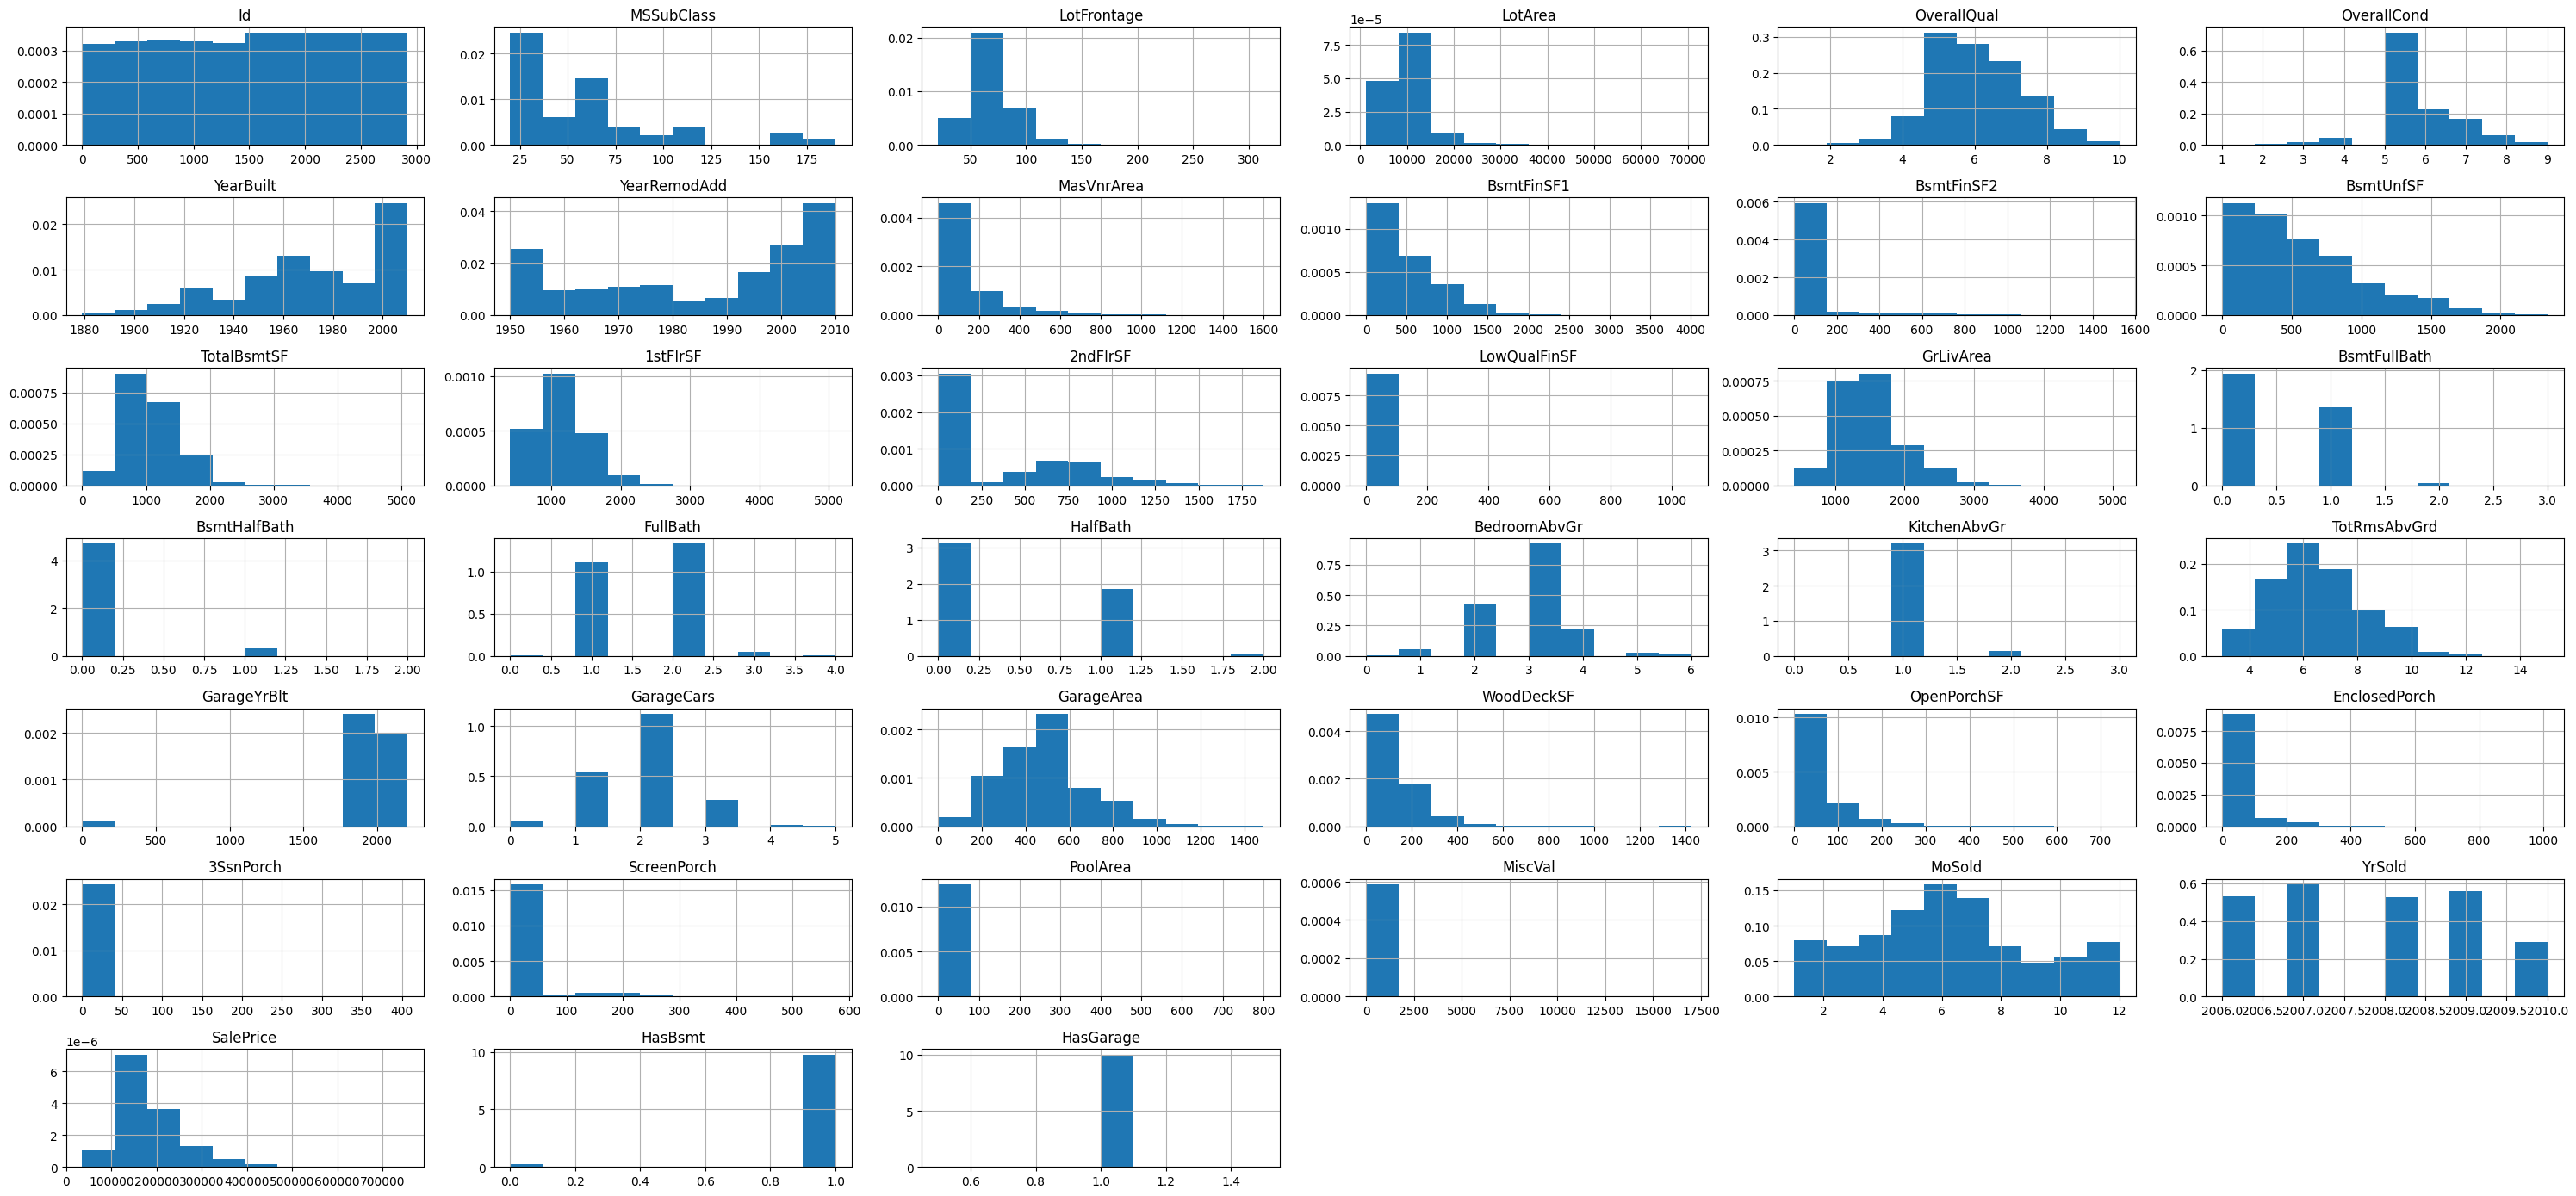

In [33]:
#In order to better understand the numerical data, histogram of each numeric column is plotted. 
histograms = df[numeric_columns].hist(figsize=(30,14), density=True)
plt.tight_layout()

## insights from numeric columns histograms
1.  ID column, as its name suggested, is a sequenced increasing number
2.  OverallQual, TotRmsAbvGrd, GarageArea, and MoSold show some **normal distribution patterns.** 
3.  BsmtUnfSf, SalePrice, OpenPorchSF, WoodDeckSF, MasVnrArea, 1stFlrSF, OverallCond show **skewed right pattern** 
4.  YearBuilt, GarageYrBlt, YearRemodAdd show **skewed left pattern** 


# Normalization of features


Features which depict normal distribution behaivor would be normalize by standardscaler

In [34]:
normal_distributed_features = ['OverallQual', 'TotRmsAbvGrd']
scaler = StandardScaler()
scaler.fit(df[normal_distributed_features])
df[normal_distributed_features] = (scaler.transform(df[normal_distributed_features]))

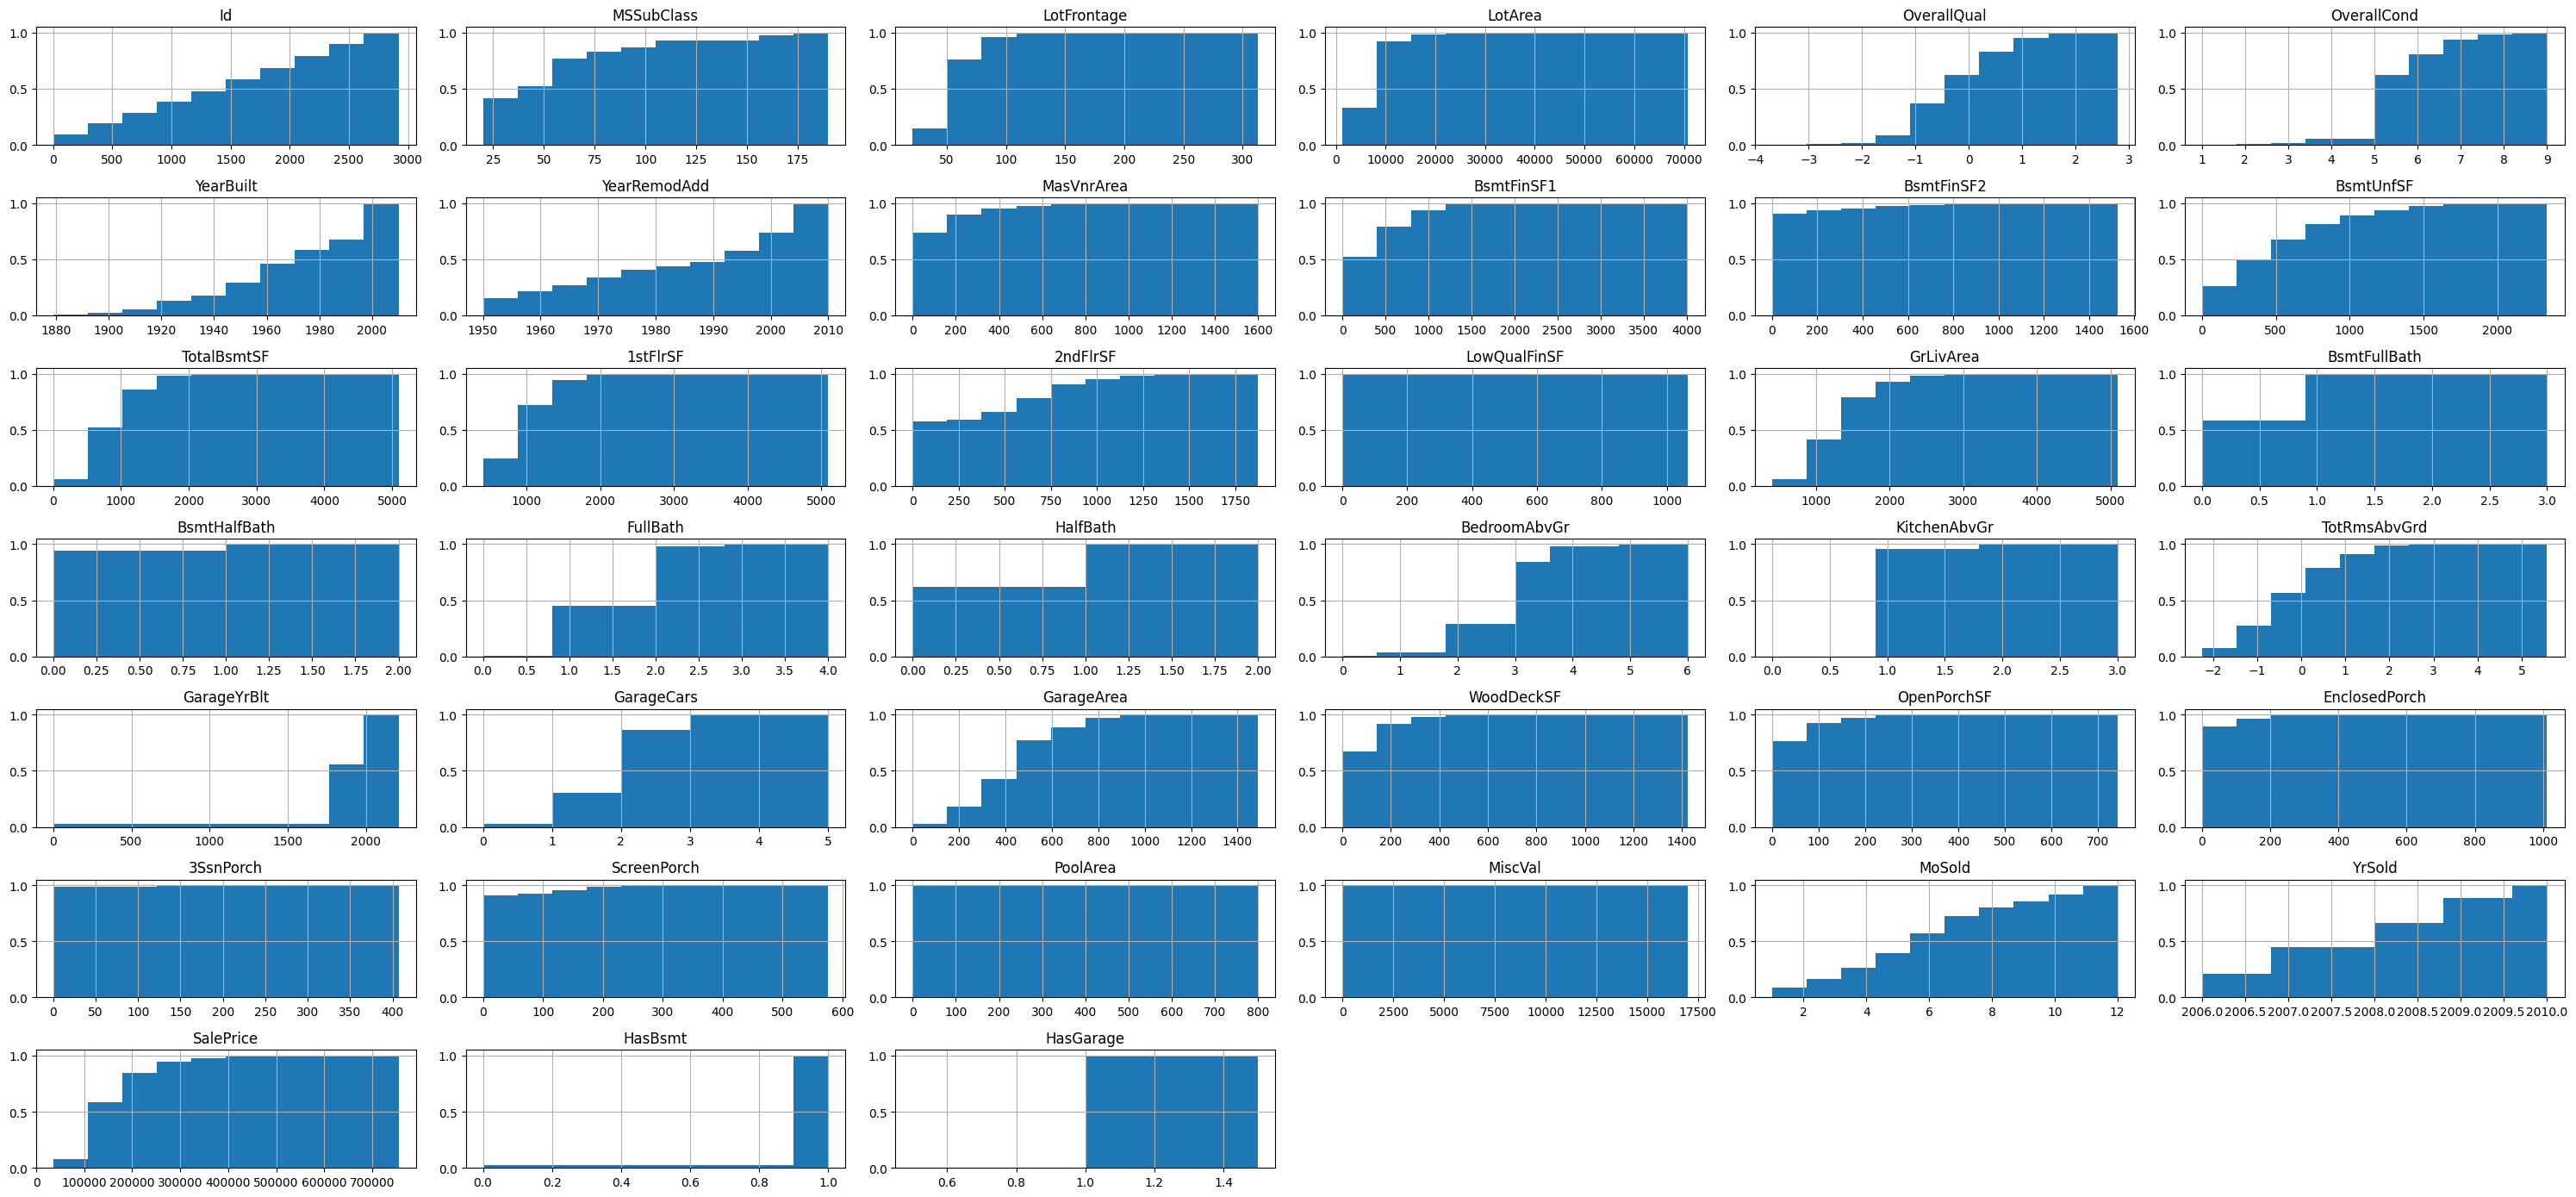

In [35]:
#cumulative distribution of numerical data 
histograms = df[numeric_columns].hist(figsize=(30,14), density=True, cumulative=True)
plt.tight_layout()

In [36]:
df.isna().sum().sort_values(ascending=False).head(10) #No more NaNs

SalePrice       1459
Id                 0
KitchenAbvGr       0
GarageCars         0
GarageFinish       0
GarageYrBlt        0
GarageType         0
Functional         0
TotRmsAbvGrd       0
KitchenQual        0
dtype: int64

In [37]:
from sklearn.preprocessing import LabelEncoder
cols = ('BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(df[c].values)) 
    df[c] = lbl.transform(list(df[c].values))


# Feature Engineering
 
This is the most important part of the project, as it is the part where we can create new features, and also, where we can use our domain knowledge to create new features. 

We'll dived the feature engineering into two parts: 

1.  **Feature engineering based on data** - this is the part where we use the data to create new features from the existing ones.
2.  **Feature engineering based on domain knowledge** - this is the part where we use our domain knowledge to create new features. 


## Feature engineering based on data 

from the data documentation we can see that there are some features which are related to each other, and we can create new features from them. 

In [38]:
#Add more Features to the dataset 
#We know that the house pricing is dependent on a lot of factors, so we will add more features to the dataset to make it more accurate: 
#The price of a house is dependent on the location, size, quality, condition, etc. 
#We will add the following features to the dataset:
def add_features(df):

        df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF'] #Total square feet area of the house
        df["Total_Bathrooms"] = (df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])) #Total number of bathrooms
        df["Total_porch_sf"] = (df["OpenPorchSF"] + df["3SsnPorch"] + df["EnclosedPorch"] + df["ScreenPorch"] + df["WoodDeckSF"]) #Total porch square feet area
        df["haspool"] = df["PoolArea"].apply(lambda x: 1 if x > 0 else 0) #Does the house have a pool?

        df["has2ndfloor"] = df["2ndFlrSF"].apply(lambda x: 1 if x > 0 else 0) #Does the house have a 2nd floor?
        df["hasgarage"] = df["GarageArea"].apply(lambda x: 1 if x > 0 else 0) #Does the house have a garage?
        df["hasbsmt"] = df["TotalBsmtSF"].apply(lambda x: 1 if x > 0 else 0) #Does the house have a basement?
        df["Total_Home_Quality"] = df["OverallQual"] * df["OverallCond"] #Total home quality
        df["Home_quality"] = df["TotalSF"] * df["Total_Home_Quality"] 
        df["Total_Bathrooms_OverallQual"] = df["Total_Bathrooms"] * df["OverallQual"]
        df["TotalSF"] = df["TotalSF"].apply(lambda x: np.log(x) if x > 0 else 0)
        df["SqFtPerRoom"] = df["GrLivArea"] / (df["TotRmsAbvGrd"] + df["FullBath"] + df["HalfBath"] + df["KitchenAbvGr"])
        df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']

        df["HighQualSF"] = df["GrLivArea"]+df["1stFlrSF"] + df["2ndFlrSF"]+0.5*df["GarageArea"]+0.5*df["TotalBsmtSF"]+1*df["MasVnrArea"]
        df["LowQualSF"] = df["MasVnrArea"] +df["WoodDeckSF"]+df["OpenPorchSF"]+df["EnclosedPorch"]+df["3SsnPorch"]+df["ScreenPorch"]+df["PoolArea"]
        df["QualityproductSF"] = df["GrLivArea"]*(df['OverallQual'])
        df["LowQualSF"] = df["MasVnrArea"]+df["WoodDeckSF"] + df["OpenPorchSF"]+df["PoolArea"]
        df.loc[df['BsmtFinSF1']==0,'BsmtFinType1']='Unf'
        df.loc[df['BsmtFinSF2']==0,'BsmtQual']='TA'
        df["age"] = df["YrSold"].astype(str).astype(int) - df["YearBuilt"].astype(str).astype(int) #Age of the house when sold
        df["age_remod"] = df["YrSold"].astype(str).astype(int) - df["YearRemodAdd"].astype(str).astype(int) #Age of the house when remodeled
        df['YrBltRmd']= df['YearBuilt']+ df['YearRemodAdd'] #Year the house was built and remodeled 
        df['old_house'] = df['YearBuilt'].apply(lambda x: 1 if x <1990 else 0) #Is the house old 
        df['new_house'] = df['YearBuilt'].apply(lambda x: 1 if x >2000 else 0) #Is the house new 
        df['remodeled'] = df['YearRemodAdd'].apply(lambda x: 1 if x >2000 else 0) #Was the house remodeled 
        df['recent_remodel'] = df['YearRemodAdd'].apply(lambda x: 1 if x >2010 else 0) #Was the house remodeled recently
        df['old_remodel'] = df['YearRemodAdd'].apply(lambda x: 1 if x <1990 else 0) #Was the house remodeled a long time ago 
        df["Total_sqr_footage"] = (df["BsmtFinSF1"] + df["BsmtFinSF2"] + df["1stFlrSF"] + df["2ndFlrSF"]) #Total square feet of the house
        df["Total_Bathrooms"] = (df["FullBath"] + (0.5 * df["HalfBath"]) + df["BsmtFullBath"] + (0.5 * df["BsmtHalfBath"])) #Total number of bathrooms

        return df


df = add_features(df)

In [39]:
df.isna().sum().sort_values(ascending=False).head(10)

SalePrice        1459
Id                  0
MSSubClass          0
SaleCondition       0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
MiscFeature         0
PoolQC              0
dtype: int64

## Feature engineering based on domain knowledge 

From our knowledge of the domain, we know that we there are many parameters which can affect the price of a property, that not neccessarily are in the data or related to the features in the data. 

For expample we know that the crime rate in specific area can affect the price of a property, and we can create a feature which will indicate the crime rate in the area of the property. 

we took the data from the website: https://www.neighborhoodscout.com/ia/ames/crime 

In [40]:
df["Safest_Ames_neighborhoods"] = df["Neighborhood"].apply(lambda x: 1 if x in ["Bloomington Heights", "Top-O-Hollow", "University Village", "Schilletter Village", "Ames Northwest", "Oak-Riverside", "Westside", "Oak-Wood-Forest", "Kate Mitchell", "Historic Old Town", "North Old Town", "Somerset Village", "Northridge"] else 0)
df["GreatestAmes_Income_Growth"] = df["Neighborhood"].apply(lambda x: 1 if x in ["Iowa State University South", "College Creek", "Edwards", "University Village", "Schilletter Village", "Ames Northwest", "Oak-Riverside", "Westside", "Oak-Wood-Forest", "Kate Mitchell", "Historic Old Town", "North Old Town", "Somerset Village", "Northridge"] else 0)
df["Most_expensive_Ames_neighborhoods"] = df["Neighborhood"].apply(lambda x: 1 if x in ["Somerset Village", "Northridge", "Iowa State University South", "Bloomington Heights", "Top-O-Hollow", "Bloomington", "Shipley", "Iowa State University", "College Creek", "Edwards", "Timber East", "State Ave", "Westside", "Oak-Wood-Forest", "South Campus Area"] else 0)
df["Most_popular_Ames_neighborhoods"] = df["Neighborhood"].apply(lambda x: 1 if x in ["Iowa State University South", "College Creek", "Edwards", "University Village", "Schilletter Village", "Ames Northwest", "Oak-Riverside", "Westside", "Oak-Wood-Forest", "Kate Mitchell", "Historic Old Town", "North Old Town", "Somerset Village", "Northridge"] else 0)

## Additionl Feature - Google Maps API 

In this section, we will use the Google Maps API to get the latitude and longitude of each neighborhood. 

We know, from our knowledge of the domain, that the location of the property can affect the price of the property, Wheather it is in the center of the city, or in the outskirts, wheather in close to universities, hospitals, schools, etc. 

We calculated the distance from each neighborhood to the center of the city, and also, the distance from each neighborhood to the nearest university, hospital, school, etc. 

for each neighborhood we added the number of amenities in the neighborhood, and the number of amenities in the 3km radius of the neighborhood.

In [41]:
import googlemaps

try: 
    gmaps = googlemaps.Client(key='')
except: 
    gmaps = None

In [42]:
import pickle
import os
from rich import print
import time

AMES_GOLOCATIONS = (42.034722, -93.62)

def gmaps_smart_search(type, location= AMES_GOLOCATIONS, radius=10000):
    results = []
    search = gmaps.places_nearby(location =location , radius = radius, type = type) 
    if 'next_page_token' not in search:
        for res in search['results']:
                results.append(res)
        return results
    while 'next_page_token' in search:
        if 'results' not in search:
            break
        for res in search['results']:
            results.append(res)
        try:
            time.sleep(2)
            search = gmaps.places_nearby(page_token=search['next_page_token'])
        except:
            break
    if 'results' in search:
        for res in search['results']:
            results.append(res)
    return results


def inspect_results(results):
    print(f"Total of {len(results)} results found")
    for result in results:
        print(result['name'], result['geometry']['location']['lat'], result['geometry']['location']['lng'], result['types'])

def distance_between_corrdinates(lat1, lon1, lat2, lon2):
    from math import sin, cos, sqrt, atan2, radians
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance


# GMAPS data directory
GMAPS_DIRECTORY = "gmaps_data"
if not os.path.exists(GMAPS_DIRECTORY):
    os.makedirs(GMAPS_DIRECTORY)

def save_gmaps_data(type, data):
    with open(os.path.join(GMAPS_DIRECTORY, type + ".pickle"), "wb") as f:
        pickle.dump(data, f)

def load_gmaps_data(type):
    with open(os.path.join(GMAPS_DIRECTORY, type + ".pickle"), "rb") as f:
        return pickle.load(f)

def check_gmaps_data(type):
    return os.path.exists(os.path.join(GMAPS_DIRECTORY, type + ".pickle"))

def get_gmaps_data(type, location=AMES_GOLOCATIONS, radius=10000):
    if check_gmaps_data(type):
        return load_gmaps_data(type)
    else:
        data = gmaps_smart_search(type, location, radius)
        save_gmaps_data(type, data)
        return data

In [43]:
neighbrhood_geocode = {}
if not check_gmaps_data("neighbrhood_geocode"):
    for i in df["Neighborhood"].unique():
        result = gmaps.geocode(i + " Ames Iowa") 
        neighbrhood_geocode[i] = result[0]['geometry']['location']
    save_gmaps_data("neighbrhood_geocode", neighbrhood_geocode)
else: 
    neighbrhood_geocode = load_gmaps_data("neighbrhood_geocode")

for i in df["Neighborhood"].unique():
    latitude, longitude =  neighbrhood_geocode[i]['lat'], neighbrhood_geocode[i]['lng']
    df.loc[df["Neighborhood"] == i, "latitude"] = latitude
    df.loc[df["Neighborhood"] == i, "longitude"] = longitude 

In [44]:
schools = get_gmaps_data("school") 
supermarket = get_gmaps_data("grocery_or_supermarket")
hospitals = get_gmaps_data("hospital")
pharm = get_gmaps_data("pharmacy")
park = get_gmaps_data("park")
kinder_garden = get_gmaps_data("kindergarten")
elementary_school = get_gmaps_data("elementary_school")
middle_school = get_gmaps_data("middle_school")
high_school = get_gmaps_data("secondary_school")
university = get_gmaps_data("university")
church = get_gmaps_data("church")
bus_station = get_gmaps_data("bus_station")
resturant = get_gmaps_data("restaurant") 
cafe = get_gmaps_data("cafe")
bar = get_gmaps_data("bar")
gym = get_gmaps_data("gym")
train_station = get_gmaps_data("train_station")
airport = get_gmaps_data("airport")
city_hall = get_gmaps_data("city_hall")
transit_station = get_gmaps_data("transit_station") 
tourist_attraction = get_gmaps_data("tourist_attraction") 
employment_agency = get_gmaps_data("employment_agency") 

In [45]:
THRESHOLD = 3 #in km
coordinate_sets = {'schools': schools, 'supermarket': supermarket, 'hospitals': hospitals, 'pharm': pharm, 'park': park, 'kinder_garden': kinder_garden, 'elementary_school': elementary_school, 
                'middle_school': middle_school, 'high_school': high_school, 'university': university, 'church': church, 'bus_station': bus_station, 'resturant': resturant, 'cafe': cafe, 'bar': bar, 'gym': gym,
                "train_station": train_station, "airport": airport, 'city_hall': city_hall, 'transit_station': transit_station, 'tourist_attraction': tourist_attraction, 'employment_agency': employment_agency}

for nieghbrhood in df.Neighborhood.unique(): 
    for set, items in coordinate_sets.items():
        count = 0 
        for item in items:
            if set == 'elementary_school':
                if 'school' not in item['types']:
                    continue
                if 'primary_school' not in item['types']:
                    continue
            if set == 'middle_school':
                if 'school' not in item['types']:
                    continue
            if set == 'high_school':
                if 'school' not in item['types']:
                    continue
                if 'secondary_school' not in item['types']:
                    continue
            if set == "church":
                if 'place_of_worship' not in item['types']:
                    continue
            if set == "university":
                if 'university' not in item['types']:
                    continue
            if distance_between_corrdinates(df.loc[df["Neighborhood"] == nieghbrhood, "latitude"].values[0], df.loc[df["Neighborhood"] == nieghbrhood, "longitude"].values[0], item['geometry']['location']['lat'], item['geometry']['location']['lng']) < THRESHOLD:
                count += 1
        df.loc[df["Neighborhood"] == nieghbrhood, set] = count
    
df[["Neighborhood"] + list(coordinate_sets.keys())].head()


,Neighborhood,schools,supermarket,hospitals,pharm,park,kinder_garden,elementary_school,middle_school,high_school,...,resturant,cafe,bar,gym,train_station,airport,city_hall,transit_station,tourist_attraction,employment_agency
0,CollgCr,36.0,4.0,6.0,23.0,41.0,40.0,0.0,1.0,1.0,...,46.0,39.0,38.0,18.0,0.0,0.0,1.0,60.0,12.0,40.0
1,Veenker,28.0,2.0,2.0,13.0,26.0,22.0,0.0,1.0,1.0,...,23.0,28.0,20.0,13.0,0.0,0.0,0.0,39.0,5.0,22.0
2,CollgCr,36.0,4.0,6.0,23.0,41.0,40.0,0.0,1.0,1.0,...,46.0,39.0,38.0,18.0,0.0,0.0,1.0,60.0,12.0,40.0
3,Crawfor,20.0,4.0,6.0,20.0,25.0,38.0,0.0,1.0,1.0,...,34.0,22.0,22.0,14.0,0.0,0.0,1.0,42.0,9.0,38.0
4,NoRidge,27.0,1.0,0.0,7.0,24.0,17.0,0.0,1.0,1.0,...,18.0,23.0,11.0,12.0,0.0,0.0,0.0,33.0,4.0,17.0


In [46]:
df.isna().sum().sort_values(ascending=False)

SalePrice                      1459
Id                                0
Total_Bathrooms_OverallQual       0
has2ndfloor                       0
hasgarage                         0
                               ... 
Heating                           0
TotalBsmtSF                       0
BsmtUnfSF                         0
BsmtFinSF2                        0
employment_agency                 0
Length: 132, dtype: int64

## Add economic features from fred (Federal Reserve Economic Data) API 

### Ames housing data (hosing indicators) from 2006 to 2010 https://fred.stlouisfed.org/searchresults/?st=Ames%2C%20IA 

### Economic Factors 

House prices in the United States can be affected by a variety of economic factors, including:

* Interest rates: When interest rates are low, borrowing is cheaper and more people can afford to buy homes, which can drive up demand and prices. Conversely, when interest rates are high, it can become more expensive to buy a home, reducing demand and putting downward pressure on prices.

* Unemployment rate: High unemployment can reduce the demand for housing, as people have less money to spend on buying homes. This can lead to lower house prices. Conversely, when the unemployment rate is low, people have more money to spend, which can drive up demand and prices.

* Income and wages: Higher incomes and wages can increase the ability of people to afford homes, driving up demand and prices. Conversely, lower incomes and wages can reduce demand and put downward pressure on prices.

* Population growth: When the population grows, the demand for housing can increase, putting upward pressure on prices. Conversely, when the population decreases or grows more slowly, demand for housing can decrease, putting downward pressure on prices.

* Supply and demand: The balance between supply and demand is one of the most important factors affecting house prices. When demand for housing is high but there is a shortage of homes for sale, prices can rise. Conversely, when demand is low and there is an excess of homes for sale, prices can decrease.

In [47]:
# Initialize the FRED API
from fredapi import Fred
fred = Fred(api_key='22aa3a338ad02dd4b61dd8421959ae97')

In [48]:
#get the unemployment rate per month from 2006 to 2010
unemployment_rate = fred.get_series('UNRATE', observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')
intrest_rate = fred.get_series('DFF', observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')
mortgage_rate = fred.get_series('MORTGAGE30US', observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')
population = fred.get_series('POPTHM', observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')
inflation = fred.get_series('CPIAUCSL', observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')

In [49]:
#merge all the data into one dataframe 
df_economic = pd.DataFrame({'unemployment_rate': unemployment_rate, 'intrest_rate': intrest_rate, 'mortgage_rate': mortgage_rate, 'population': population, 'inflation': inflation})
df_economic.index = pd.to_datetime(df_economic.index).strftime('%Y-%m')
df_economic.head()

,unemployment_rate,intrest_rate,mortgage_rate,population,inflation
2006-01,4.7,4.29,6.15,297526.0,199.3
2006-02,4.8,4.49,6.25,297734.0,199.4
2006-03,4.7,4.59,6.32,297950.0,199.7
2006-04,4.7,4.79,6.51,298170.0,200.7
2006-05,4.6,4.94,6.60,298401.0,201.3


In [50]:
#Ames housing data (hosing indicators) from 2006 to 2010 https://fred.stlouisfed.org/searchresults/?st=Ames%2C%20IA
indicators = {"AMES119URN": "Unemployment_Rate_in_Ames",
                "NGMP11180": "Total_Gross_Domestic_Product_Ames",
                "ATNHPIUS11180Q": "All-Transactions_House_Price_Index_Ames",
                "AMEPOP": "Resident_Population_in_Ames",
                "MEDLISPRIPERSQUFEE11180": "Median_Listing_Price_per_Square_Feet_Ames",
                "AMES119PCPI": "Per_Capita_Personal_Income_Ames",
                "QGMP11180": "Total_Quantity_Indexes_for_Real_GDP",
                "PCRGMP11180": "Total_Per_Capita_Real_Gross_Domestic_Produc",
                "RGMP11180": "Total_Real_Gross_Domestic_Product_Ames",
                "RPPALL11180": "Regional_Price_Parities_All_Items_Ames",
                "MEDDAYONMARYY11180": "Median_Days_on_Market_Year_Over_Year_Ames",
                "AMES119NA": "All_Employees_Total_Nonfarm_Ames",
                "ACTLISCOU11180": "Active_Listing_Count_Ames",
                "SMU19111809091000001SA": "All_Employees_Government_Federal_Government_Ames",
                "AMES119LFN": "Civilian_Labor_Force_Ames",
                "AMES119GOVT": "All_Employees_Government_Ames",
                "RPIPC11180": "Real_Per_Capita_Personal_Income_Ames",
                "LAUMT191118000000005": "Employed_Persons_Ames",
                "LAUMT191118000000004": "Unemployed_Persons_Ames",
                "SMU19111800600000001": "All_Employees_Goods_Producing_Ames",
                "SMU19111809092000001SA": "All_Employees_Government_State_Government_Ames",
                "SMU19111809092000001": "All_Employees_State_Government_Ames",
                "RPPSERVERENT11180": "Regional_Price_Parities_Services_Housing_Ames",
                "PRIREDCOUMM11180": "Price_Reduced_Count_Month_Over_Month_Ames",
                "PENLISCOU11180": "Pending_Listing_Count_Ames",
                "PRIINCCOU11180": "Price_Increased_Count_Ames",
                "SMU19111809091000001A": "All_Employees_Federal_Government_Ames",
                "SMU19111800500000002": "Average_Weekly_Hours_of_All_Employees_Total_Private_Ames",
                "SMU19111800500000002A": "Average_Weekly_Hours_of_All_Employees_Total_Private_Ames",
                "NEWLISCOU11180": "New_Listing_Count_Ames",
                "MEDLISPRI11180": "Median_Listing_Price_Ames",
                "AVELISPRI11180": "Average_Listing_Price_Ames",
                "RPPSERVEOTH11180": "Regional_Price_Parities_Services_Other_Ames",
                "ENUC111830010SA": "Total_Quarterly_Wages_Ames"}

for key, value in indicators.items():
    try: 
        df_economic[value] = fred.get_series(key, observation_start='2006-01-01', observation_end='2010-12-31', frequency='m')
    except:
        pass 

In [51]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,resturant,cafe,bar,gym,train_station,airport,city_hall,transit_station,tourist_attraction,employment_agency
0,1,5,RL,65.0,8450,1,None,3,Lvl,Inside,...,46.0,39.0,38.0,18.0,0.0,0.0,1.0,60.0,12.0,40.0
1,2,0,RL,80.0,9600,1,None,3,Lvl,FR2,...,23.0,28.0,20.0,13.0,0.0,0.0,0.0,39.0,5.0,22.0
2,3,5,RL,68.0,11250,1,None,0,Lvl,Inside,...,46.0,39.0,38.0,18.0,0.0,0.0,1.0,60.0,12.0,40.0
3,4,6,RL,60.0,9550,1,None,0,Lvl,Corner,...,34.0,22.0,22.0,14.0,0.0,0.0,1.0,42.0,9.0,38.0
4,5,5,RL,84.0,14260,1,None,0,Lvl,FR2,...,18.0,23.0,11.0,12.0,0.0,0.0,0.0,33.0,4.0,17.0


In [52]:
#Remove the 0 before the month in the index for 2006-05 we want to have 2006-5 
df_economic.index = df_economic.index.str.replace('-0', '-')
df_economic.head()

,unemployment_rate,intrest_rate,mortgage_rate,population,inflation,Unemployment_Rate_in_Ames,Median_Listing_Price_per_Square_Feet_Ames,Median_Days_on_Market_Year_Over_Year_Ames,All_Employees_Total_Nonfarm_Ames,Active_Listing_Count_Ames,...,All_Employees_Goods_Producing_Ames,All_Employees_Government_State_Government_Ames,All_Employees_State_Government_Ames,Price_Reduced_Count_Month_Over_Month_Ames,Pending_Listing_Count_Ames,Price_Increased_Count_Ames,Average_Weekly_Hours_of_All_Employees_Total_Private_Ames,New_Listing_Count_Ames,Median_Listing_Price_Ames,Average_Listing_Price_Ames
2006-1,4.7,4.29,6.15,297526.0,199.3,2.9,NaN,NaN,46.7,NaN,...,6.3,13.217996,13.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-2,4.8,4.49,6.25,297734.0,199.4,2.9,NaN,NaN,46.7,NaN,...,6.5,13.205720,13.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-3,4.7,4.59,6.32,297950.0,199.7,2.6,NaN,NaN,46.6,NaN,...,6.5,13.196976,13.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-4,4.7,4.79,6.51,298170.0,200.7,2.3,NaN,NaN,46.8,NaN,...,6.6,13.194331,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-5,4.6,4.94,6.60,298401.0,201.3,2.4,NaN,NaN,47.0,NaN,...,6.7,13.277458,13.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# for col in df_economic.columns:
#     if df_economic[col].isnull().sum() > 0:
#         df_economic.drop(col, axis=1, inplace=True)

In [54]:
#Merge the economic data with the housing data (such as each house that sold in a month-year, will have the economic data of that month-year) 
df["Month-Year"] = df["YrSold"].astype(str) + "-" + df["MoSold"].astype(str) #Year and month the house was sold 
all_data = pd.merge(df, df_economic, how='left', left_on='Month-Year', right_index=True) 
all_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,All_Employees_Goods_Producing_Ames,All_Employees_Government_State_Government_Ames,All_Employees_State_Government_Ames,Price_Reduced_Count_Month_Over_Month_Ames,Pending_Listing_Count_Ames,Price_Increased_Count_Ames,Average_Weekly_Hours_of_All_Employees_Total_Private_Ames,New_Listing_Count_Ames,Median_Listing_Price_Ames,Average_Listing_Price_Ames
0,1,5,RL,65.0,8450,1,None,3,Lvl,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0,RL,80.0,9600,1,None,3,Lvl,FR2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5,RL,68.0,11250,1,None,0,Lvl,Inside,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6,RL,60.0,9550,1,None,0,Lvl,Corner,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,RL,84.0,14260,1,None,0,Lvl,FR2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df = all_data.copy()
df.isna().sum().sort_values(ascending=False)

Average_Listing_Price_Ames       2802
All_Employees_Government_Ames    2802
intrest_rate                     2802
mortgage_rate                    2802
population                       2802
                                 ... 
TotRmsAbvGrd                        0
Functional                          0
GarageType                          0
GarageYrBlt                         0
HasBsmt                             0
Length: 158, dtype: int64

In [56]:
for col in df.columns:
    if col not in ["SalePrice", "Id"]:
        if df[col].isnull().sum() > 0:
            df.drop(col, axis=1, inplace=True)
        
df.isna().sum().sort_values(ascending=False)

SalePrice             1459
Id                       0
hasgarage                0
hasbsmt                  0
Total_Home_Quality       0
                      ... 
HeatingQC                0
Heating                  0
TotalBsmtSF              0
BsmtUnfSF                0
Month-Year               0
Length: 133, dtype: int64

## Visualizing the data 

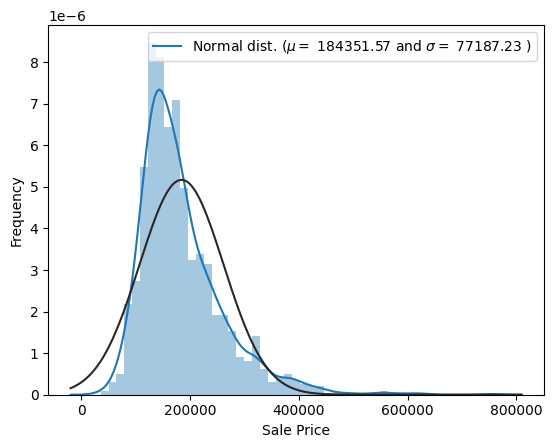

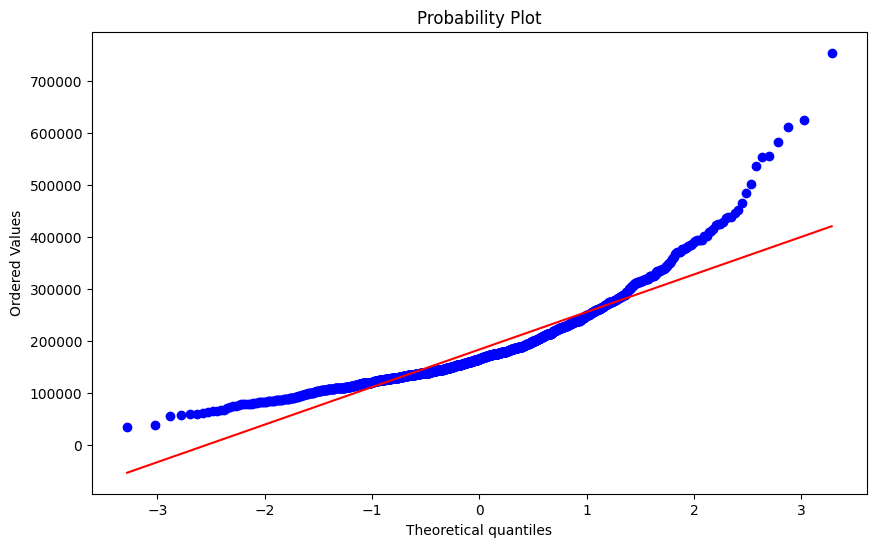

In [57]:
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from scipy.stats import norm
from scipy import stats

def displot(data):
    sns.distplot(data, fit=norm)
    plt.xlabel("Sale Price")
    plt.ylabel("Frequency")

    mu, sigma = norm.fit(data) 
    plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )".format(mu, sigma)], loc="best");

    plt.figure(figsize=(10,6))
    stats.probplot(data, plot=plt)

displot(df[df["SalePrice"] > 0]["SalePrice"])

In [58]:
print("Skewness: %f" % df["SalePrice"].skew()) 
print("Kurtosis: %f" % df["SalePrice"].kurt())

Skewness: 1.800111

Kurtosis: 5.692598

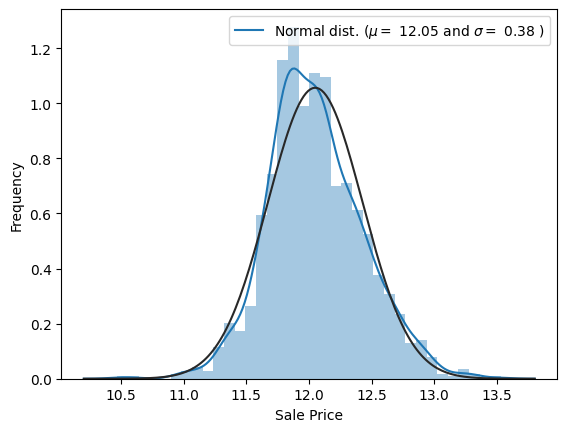

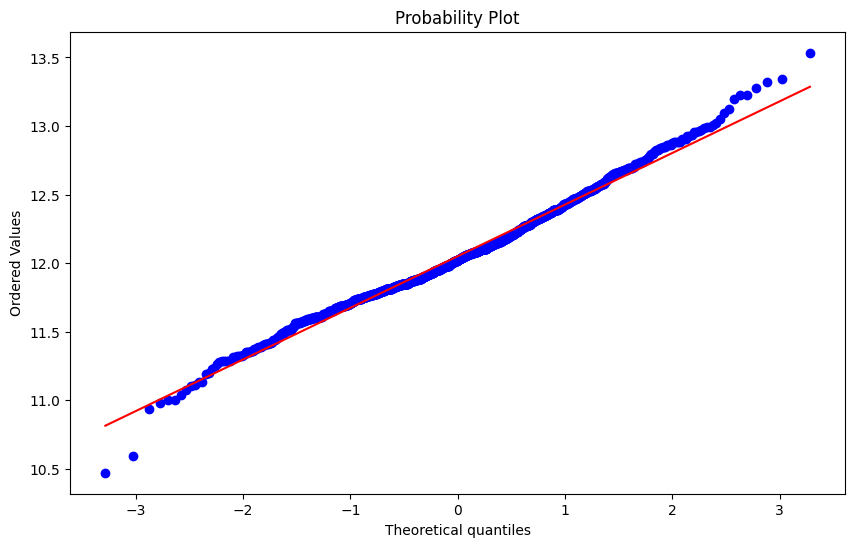

In [59]:
#log transform the target variable 
df["SalePrice"] = np.log1p(df["SalePrice"]) #log(1+x) transform
displot(df[df["SalePrice"] > 0]["SalePrice"]) #plot the distribution of the target variable after the log transform

### Skewed features 

Skewed features are features which are not normally distributed, but instead has a skewed distribution with a long tail in one direction. 
This can occur when the data contains outliers or when the feature values are not evenly spread across the range. 

Skewed features can impact the performance of machine learning models in several ways:

* Bias: Skewed features can lead to bias in the model, since the model will be more influenced by the samples in the long tail of the distribution.

* Overfitting: Models may overfit to the long tail of the skewed feature and not generalize well to new data.

* Numerical Stability: Some algorithms, such as linear regression, can be sensitive to the presence of skewed features and may not converge properly.

Therefore, it is important to handle skewed features when building machine learning models. One common approach is to transform the skewed feature to make it more normally distributed. This can be done using techniques such as log transformation, square root transformation, or Box-Cox transformation. 

We choose to use boxcox transformation for the skewed features. 

The transformation is based on a power transformation and is defined as:

y = (x^λ - 1) / λ for λ ≠ 0

y = log(x) for λ = 0

where x is the original feature, y is the transformed feature, and λ is the power parameter that is chosen to produce the best normalization of the feature. 
The Box-Cox transformation is a flexible approach that can handle a wide range of skewed distributions and can be used to transform both positive and negative values.

To determine the best value of λ we try a range of values and select the one that results in the best normalization of the feature. 

Two methods can be used to determine the best value of λ:

1. **Maximum Likelihood Estimation (MLE)**: The MLE method involves fitting a model to the transformed feature and then selecting the value of λ that results in the best fit. This can be done using a grid search of different values of λ and selecting the value that results in the lowest AIC or BIC. 

2. **Likelihood Ratio Test (LRT)**: The LRT method involves fitting a model to the transformed feature and then comparing the fit of the model with the transformed feature to the fit of the model with the original feature. The value of λ that results in the best fit is then selected. 

3. **Shapiro-Wilk Test**: The Shapiro-Wilk test can be used to determine whether a feature is normally distributed.

4. **Q-Q Plot**: A Q-Q plot can be used to visually inspect whether a feature is normally distributed.











In [60]:
from scipy.stats import skew 
from scipy.special import boxcox1p

def fix_skewness(df):

    numeric_feats = df.select_dtypes(include=[np.number]).columns #get all the numeric features

    skewed_feats = df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False) #compute skewness
    print("\nSkew in numerical features: \n")
    skewness = pd.DataFrame({'Skew' :skewed_feats})
    skewness.head(5)

    skewness = skewness[abs(skewness) > 0.5] #keep only the features that are skewed more than 0.75 
    print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))


    skewed_features = skewness.index
    lam = 0.15 #lam is the lambda value for boxcox1p 
    for feat in skewed_features:
        if feat not in ["SalePrice", "Id", "MoSold", "YrSold", "age", "age_remod", "longitude", "Home_quality", "age_remod"]:
            df[feat] = boxcox1p(df[feat], lam)
    return df

## Cleaning unblanced data 

Unbalanced data can have a significant impact on the performance of machine learning algorithms. 
Unbalanced data occurs when the number of samples in one class is significantly higher or lower than the number of samples in the other classes.

It's important to handle unbalanced data when building machine learning models, since unbalanced data can lead to several problems: 

* Bias in predictions: Unbalanced data can lead to a bias in the predictions made by machine learning models. The model may favor the majority class and ignore the minority class, leading to inaccurate predictions.

* Overfitting: Unbalanced data can also lead to overfitting, where the model fits too closely to the majority class and does not generalize well to new, unseen data.

* Inefficient use of data: Unbalanced data can result in an inefficient use of data, as the model will be trained on a disproportionate amount of data from the majority class and may not effectively use the minority class data.

* Algorithm limitations: Some machine learning algorithms are not well suited to handle unbalanced data and may produce suboptimal results.







In [61]:
def clean_unbalanced_data(data):
    #We can see that the data is not balanced. we will remove the features that are unbalanced. 
    categorical_features = data.select_dtypes(include=['object']).columns 
    for feature in categorical_features:
        if feature != 'SalePrice' and feature != 'longitude' and feature != 'latitude':
            if data[feature].value_counts().max() / data[feature].value_counts().sum() > 0.9:
                data.drop(feature, axis=1, inplace=True)
    return data

df = clean_unbalanced_data(df)


In [65]:
def drop_features(data):
    for col in data.columns:
        if data[col].isnull().sum() / data.shape[0] > 0.995:
            data.drop(col, axis=1, inplace=True) 
    return data


## One Hot Encoding 

We will use one hot encoding to convert all categorial features into dummies.

In [66]:
df.shape

(2802, 125)

In [67]:
#one hot encoding
def one_hot_encoding(df):
    categorial_columns = df.select_dtypes(include=['object']).columns
    for col in categorial_columns: 
        if col not in ["SalePrice", "Id"]:
            try: 
                df[col] = df[col].astype('float64')
            except: 
                df = pd.get_dummies(df, columns=[col])
    return df

df = one_hot_encoding(df)

In [68]:
df.isna().sum().sort_values(ascending=False) 

SalePrice            1459
Id                      0
Foundation_BrkTil       0
BsmtQual_0              0
Foundation_Wood         0
                     ... 
city_hall               0
airport                 0
train_station           0
gym                     0
Month-Year_4-6          0
Length: 309, dtype: int64

<AxesSubplot: xlabel='SalePrice'>

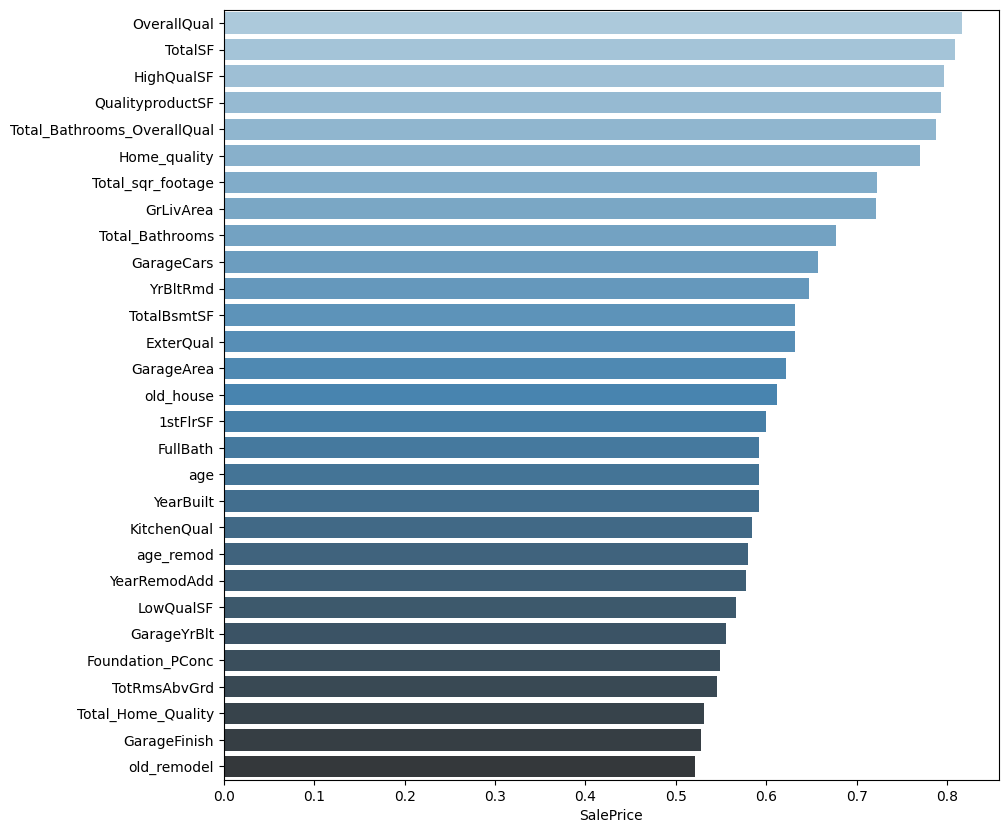

In [69]:
corrmat = df.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5].sort_values(ascending=False)
plt.figure(figsize=(10,10))
sns.barplot(x=abs(df[top_corr_features].corr()["SalePrice"]).sort_values(ascending=False)[1:], y=abs(df[top_corr_features].corr()["SalePrice"]).sort_values(ascending=False)[1:].index, palette="Blues_d")

## Spliting Data back to Train and Test ansd also putting aside form train to validation

In [70]:
df.shape

(2802, 309)

In [72]:
test_cleaned_normalized = df[df.Id > 1460] 
test_cleaned_normalized.drop("SalePrice", axis=1, inplace=True)
test_cleaned_normalized = fix_skewness(test_cleaned_normalized) 
test_cleaned_normalized.set_index("Id", inplace=True)
test_cleaned_normalized.fillna(0, inplace=True)
test_cleaned_normalized = drop_features(test_cleaned_normalized)
train_cleaned_normalized = df[df.Id <= 1460]
train_cleaned_normalized = fix_skewness(train_cleaned_normalized)
train_cleaned_normalized.fillna(0, inplace=True)
train_cleaned_normalized = drop_features(train_cleaned_normalized)

Skew in numerical features:

There are 308 skewed numerical features to Box Cox transform

Skew in numerical features:

There are 309 skewed numerical features to Box Cox transform

In [73]:
X = train_cleaned_normalized.drop(columns=['SalePrice'])
y = train_cleaned_normalized[['SalePrice', 'Id']]
X.set_index('Id', inplace=True)
y.set_index('Id', inplace=True)

In [74]:
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2)

In [75]:
y_train = y_train['SalePrice']
y_validation = y_validation['SalePrice']


In [76]:
print(X_train.shape, y_train.shape)

(1074, 307)
(1074,)

In [77]:
print(f"Original number of test samples: {test.shape[0]}")
print(f"Postprocessing number of test samples: {test_cleaned_normalized.shape[0]}")
print(f"number of features: {X.shape[1]}") 


Original number of test samples: 1459

Postprocessing number of test samples: 1459

number of features: 307

# Modeling  

In this part we will try to predict the SalePrice of the houses. 
Choosing the right model is a very important part of the project, and we will try to choose the best model for our data. 

## The models we will use are: 

1.  Linear Regression
2.  Ridge Regression
3.  Lasso Regression
4.  Elastic Net Regression
5.  Random Forest Regression
6.  Gradient Boosting Regression
7.  XGBoost Regression
8.  CatBoost Regression
9.  Stacking Regression

We choose this models because they are very common models for regression problems, and we want to see which one will perform the best on our data.

The models will be evaluated by the RMSE score, and the best model will be chosen. 

We choose RMSE because our goal is to minimize the error, and RMSE is the most common metric for regression problems. 

Q: Choose a validation creation process, why you choose it? 

A: We choose to split the data to train and test, and then split the train data to train and validation, in some model's we used k-fold cross validation to get better results. 
Our metric is RMSE, and we choose to use it because we want to minimize the error. 

Q: what is the baseline performance?  

Answer: The baseline performance is Linear Regression with no hyperparameters tuning. 
The baseline performance is the performance of the model without any tuning, and it's a good way to see if the model is improving or not. 
The preformance of the baseline model is RMSE = 0.144 and R2 = 0.84. 

Q: Which smart tricks you used to boost your model performance? 

Answer: We used a few smart tricks to boost our model performance, such as: 

* Grid Search: We used grid search to find the best hyperparameters for each model. 
* K-Fold Cross Validation: We used k-fold cross validation to get better results. 
* removing high residuals: We removed the high residuals from the train data, and then trained the model again. 


Q: Describe potential generalization issues (e.g. overfit/underfit)? How can you handle these? 

Answer: 

There are few potential generalization issues: First, we have a lot of features, and some of them are correlated, so we can get overfitting, that can be handled by removing some of the features or using regularization.
There are few ways to hendel overfitting: 

* Removing features: We can remove some of the features that are not important for the model. 
* Regularization: We can use regularization to prevent overfitting. 
* Early stopping: We can use early stopping to prevent overfitting.
* PCA: We can use PCA to reduce the number of features. 
* Ensemble methods: We can use ensemble methods to prevent overfitting. s

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet 
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.model_selection import cross_val_score, GridSearchCV 
from sklearn.metrics import mean_squared_error 

### Linear Regression 

Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables. 

In a linear regression model, the target variable is modeled as a linear combination of the independent variables and a bias term (also called the intercept).

The coefficients of the independent variables and the intercept determine the line of best fit that approximates the relationship between the dependent and independent variables. 

The goal of the linear regression model is to find the coefficients and the intercept that minimize the difference between the actual target values and the predicted values. 

In [79]:
# Linear Regression 
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_validation)
lr_rmse = np.sqrt(mean_squared_error(y_validation, lr_pred))
print(f"Linear Regression RMSE: {lr_rmse}")
print(f"Linear Regression R2: {lr.score(X_validation, y_validation)}")

Linear Regression RMSE: 0.11830623762526522

Linear Regression R2: 0.9126754967657222

In [80]:
# Model's coefficients 
coefficients = pd.DataFrame({"Feature":X.columns, "Coefficient":lr.coef_})
coefficients.sort_values(by="Coefficient", ascending=False).head(10)

,Feature,Coefficient
69,YrBltRmd,179.801630
53,TotalSF,1.230147
50,YrSold,0.276319
3,Street,0.212494
187,Exterior2nd_CmentBd,0.211431
233,SaleType_Oth,0.178685
7,OverallCond,0.175578
136,Neighborhood_StoneBr,0.163495
193,Exterior2nd_Stone,0.151906
232,SaleType_New,0.143716


## Ridge Regression 

Ridge regression is a linear model that uses L2 regularization. 
Regularization is a technique used to prevent overfitting, which occurs when a model fits the training data too closely and performs poorly on unseen data. 

The L2 regularization term is a penalty term that is added to the loss function that is optimized during training. Regularization penalizes a model for being more complex,  for linear models, it means regularization forces model coefficients to be smaller in magnitude.

The penalty term is equal to the square of the magnitude of the coefficients. 
In general, inputs having significantly large coefficients tend to drive the model predictions when all the features take values in similar ranges. 
This becomes a problem if the important feature is noisy or the model overfits to the data — because this causes the model predictions to be either driven by noise or by insignificant variations in the data. 

### Alpha in Ridge Regression: 

n Ridge Regression, the alpha parameter represents the strength of the regularization term. 

The alpha parameter controls the strength of the regularization term. A larger alpha means that the regularization term has a greater impact, which results in smaller coefficients for the features. Smaller coefficients can help reduce overfitting, but too large an alpha can lead to underfitting, where the model is too simple to capture the underlying relationship between the features and the target variable.

The choice of the alpha parameter is crucial and depends on the specific problem and the dataset being used. There are several ways to choose an appropriate alpha:

* Grid Search:  A grid search involves defining a range of possible alpha values and evaluating the performance of the model for each value using a validation set. The best alpha value is then chosen based on the performance metrics.

* Cross-Validation: K-fold cross-validation can be used to evaluate the performance of the model for different alpha values and choose the best alpha based on the average performance across the folds.

* Regularization Path: A regularization path is a plot of the coefficients of the features as a function of the alpha value. The regularization path can help to identify the appropriate alpha value by showing the trade-off between the model's complexity and its ability to fit the data.




In [81]:
# Ridge Regression 

ridge = Ridge(alpha= 1) 
ridge.fit(X_train, y_train)
ridge_train_pred = ridge.predict(X_validation)
ridge_test_pred = ridge.predict(test_cleaned_normalized)

print(f"Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_validation, ridge_train_pred))}")
print(f"Ridge Regression R2: {ridge.score(X_validation, y_validation)}")

Ridge Regression RMSE: 0.10793687418844618

Ridge Regression R2: 0.9273123695899138

In [82]:
#use cross validation to find the best alpha value 
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
cv_ridge = [cross_val_score(Ridge(alpha = alpha), X_train, y_train, scoring = "neg_mean_squared_error", cv = 5) for alpha in alphas]
cv_ridge = pd.DataFrame(cv_ridge)
cv_ridge.index = alphas
cv_ridge.columns = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
cv_ridge = cv_ridge.apply(lambda x: np.sqrt(-x))
cv_ridge["Mean"] = cv_ridge.mean(axis=1)
cv_ridge["Std"] = cv_ridge.std(axis=1)
cv_ridge.head()

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,Std
0.0001,0.103394,0.118320,0.148355,0.112519,0.158269,0.128172,0.021304
0.0010,0.103098,0.118228,0.148272,0.112464,0.158109,0.128034,0.021328
0.0100,0.102120,0.117906,0.147885,0.112055,0.157351,0.127463,0.021361
0.1000,0.100486,0.117673,0.144934,0.109113,0.155220,0.125486,0.021055
1.0000,0.095496,0.119554,0.134261,0.100594,0.150965,0.120174,0.020685


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


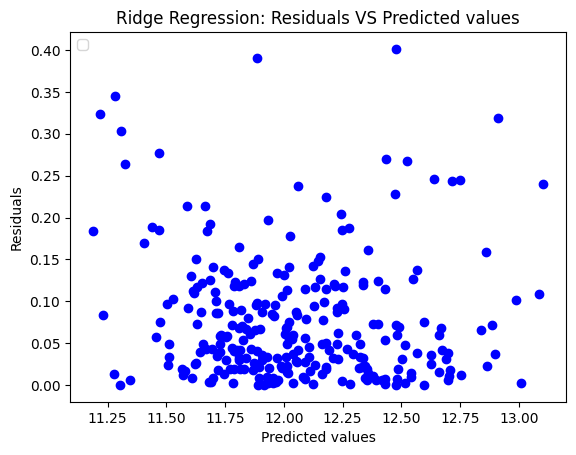

In [83]:
#plot the residuals VS the predicted values 
plt.scatter(ridge_train_pred, abs(ridge_train_pred - y_validation), c = "blue")
plt.title("Ridge Regression: Residuals VS Predicted values")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.show()


In [84]:
# P values of the features 
from statsmodels.regression.linear_model import OLS
from statsmodels.tools.tools import add_constant

X_train_cons = add_constant(X_train)
model = OLS(y_train, X_train_cons)
results = model.fit()
results.pvalues.sort_values(ascending=False).head(10)


Exterior2nd_ImStucc               0.999940
RoofStyle_Mansard                 0.992611
Exterior1st_Wd Sdng               0.986615
HouseStyle_1Story                 0.980355
Fireplaces_status_No_FirePlace    0.971017
Exterior2nd_AsphShn               0.959534
BsmtExposure                      0.955500
Exterior1st_Stucco                0.950206
Month-Year_0-6                    0.947739
Month-Year_0-5                    0.945556
dtype: float64

In [85]:
#implement Ridge Regression with feature P values is less than 0.05
X_train_cons = add_constant(X_train)
model = OLS(y_train, X_train_cons)
results = model.fit()
results.pvalues.sort_values(ascending=False).head(10)

X_train_p = X_train_cons[results.pvalues[results.pvalues < 0.05].index]
X_validation_p = X_validation[results.pvalues[results.pvalues < 0.05].index]

ridge_p = Ridge(alpha= 1)
ridge_p.fit(X_train_p, y_train)
ridge_p_train_pred = ridge_p.predict(X_validation_p)
ridge_p_test_pred = ridge_p.predict(test_cleaned_normalized[results.pvalues[results.pvalues < 0.05].index])

print(f"Ridge Regression with P values RMSE: {np.sqrt(mean_squared_error(y_validation, ridge_p_train_pred))}")
print(f"Ridge Regression with P values R2: {ridge_p.score(X_validation_p, y_validation)}")

Ridge Regression with P values RMSE: 0.1546541795037154

Ridge Regression with P values R2: 0.8507741161319557

<AxesSubplot: xlabel='Importance', ylabel='Feature'>

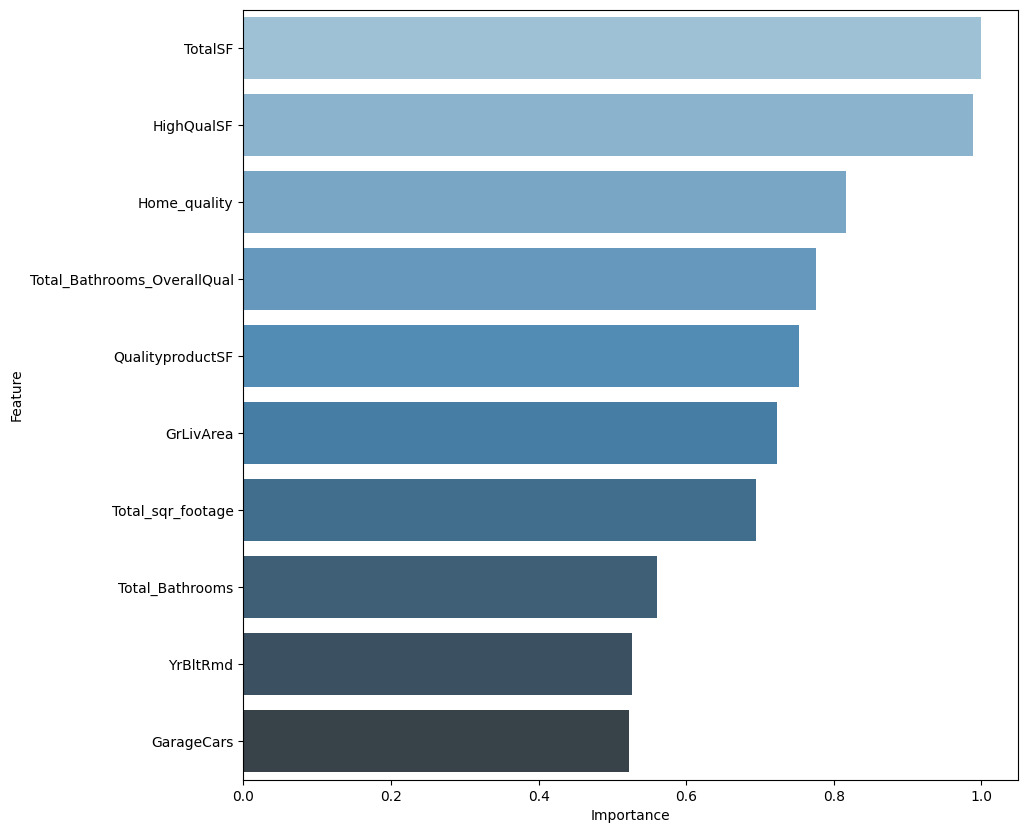

In [86]:
# Univariate regression (EDA on importance of features, not for prediction of SalePrice) 

from sklearn.feature_selection import SelectKBest, f_regression 

# Select the top 10 features
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

# Get the raw p-values for each feature, and transform from p-values into scores
scores = -np.log10(selector.pvalues_)
scores /= scores.max()


# sort the features by their importance 
features = pd.DataFrame({"Feature":X_train.columns, "Importance":scores})
top = features.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(10,10))
sns.barplot(x=top.Importance, y=top.Feature, palette="Blues_d")


## Lasso Regression

Lasso regression is a linear model that uses L1 regularization, which adds the absolute magnitude of the coefficients to the cost function that is being minimized.

Like in Ridge Regression, the alpha parameter controls the strength of the regularization term in Lasso Regression.

A larger alpha means that the regularization term has a greater impact, which results in smaller coefficients for the features.
However, the difference between Ridge and Lasso Regression lies in the type of penalty term used. 
 
The L1 penalty in Lasso Regression can result in sparse solutions, where some coefficients are exactly equal to zero. This sparsity property makes Lasso Regression well suited for feature selection, as it can effectively identify the most important features in the data.

The choice of the alpha parameter in Lasso Regression is similar to that in Ridge Regression and depends on the specific problem and dataset being used. The same methods, such as grid search, cross-validation, and regularization path, can be used to choose an appropriate alpha. 



In [87]:
# Lasso Regression 

lasso = Lasso(alpha= 0.001)
lasso.fit(X_train, y_train)
lasso_train_pred = lasso.predict(X_validation)
lasso_test_pred = lasso.predict(test_cleaned_normalized)

print(f"Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_validation, lasso_train_pred))}")
print(f"Lasso Regression R2: {lasso.score(X_validation, y_validation)}")

Lasso Regression RMSE: 0.10381937933390667

Lasso Regression R2: 0.9327522599567623

In [88]:
#Use cross validation to find the best alpha value
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
cv_lasso = [cross_val_score(Lasso(alpha = alpha), X_train, y_train, scoring = "neg_mean_squared_error", cv = 5) for alpha in alphas]
cv_lasso = pd.DataFrame(cv_lasso)
cv_lasso.index = alphas
cv_lasso.columns = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
cv_lasso = np.sqrt(-cv_lasso)
cv_lasso.sort_values(by="Fold 1", ascending=True).head(10)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0.0010,0.090299,0.119896,0.126908,0.097920,0.149807
0.0001,0.094972,0.116869,0.134172,0.100018,0.150383
0.0100,0.117614,0.138225,0.140270,0.114912,0.166207
0.1000,0.195696,0.186283,0.187101,0.171275,0.207412
1.0000,0.230325,0.230101,0.228215,0.206752,0.246988
10.0000,0.240034,0.251680,0.247787,0.223090,0.266265
100.0000,0.241205,0.251085,0.248472,0.223772,0.264683
1000.0000,0.261147,0.257668,0.265120,0.238566,0.265042


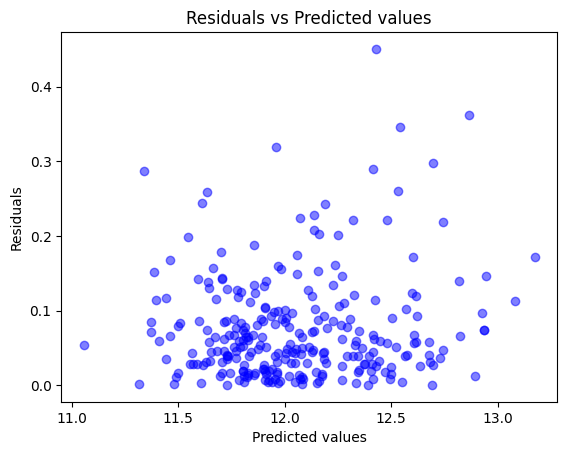

In [89]:
# plot the residuals vs the predicted values 
y_true = y_validation 
y_pred = lasso_train_pred
residuals = abs(y_true - y_pred)
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
plt.show()

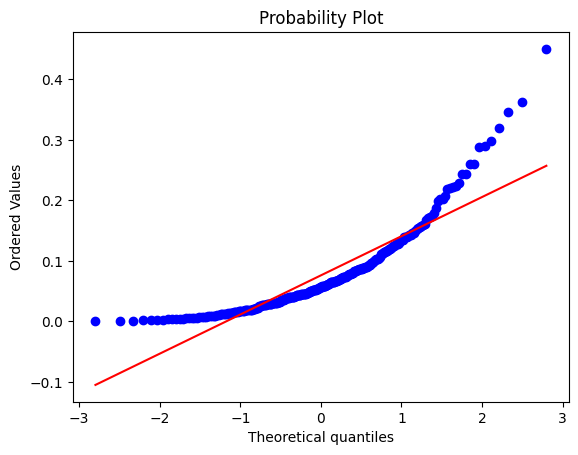

In [90]:
#QQ plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()


In [91]:
# We have some outliers in the resuduals 

#Check the outliers 
outliers = pd.DataFrame({"Id":X_validation.index, "Residuals":residuals})
outliers.sort_values(by="Residuals", ascending=False).head(10) 

,Id,Residuals
Id,,
689,689,0.450320
1047,1047,0.362507
379,379,0.346077
329,329,0.318838
474,474,0.297523
886,886,0.289657
1123,1123,0.287610
609,609,0.259714
1023,1023,0.259440


Lasso Regression RMSE: 0.10381937933390667

Lasso Regression R2: 0.9327522599567623

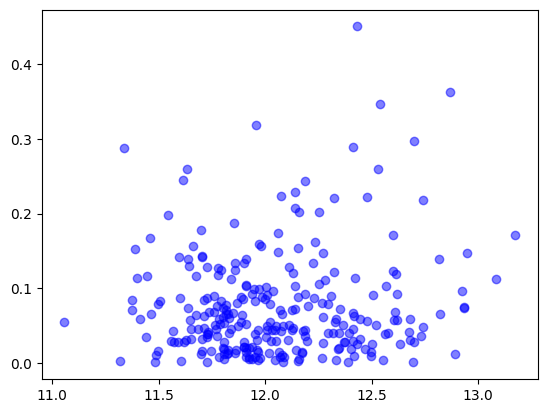

In [92]:
#we will try to remove the outliers from the training set
outliers_to_remove = outliers.sort_values(by="Residuals", ascending=False).head(10).Id 
#remove the outliers from the training set 
X_train_outliers = X_train[~X_train.index.isin(outliers_to_remove)]
y_train__outliers = y_train[~y_train.index.isin(outliers_to_remove)]


# Lasso Regression

lasso = Lasso(alpha= 0.001)
lasso.fit(X_train_outliers, y_train__outliers)
lasso_train_pred = lasso.predict(X_validation)
lasso_test_pred = lasso.predict(test_cleaned_normalized)


print(f"Lasso Regression RMSE: {np.sqrt(mean_squared_error(y_validation, lasso_train_pred))}")
print(f"Lasso Regression R2: {lasso.score(X_validation, y_validation)}")

# plot the residuals vs the predicted values
y_true = y_validation
y_pred = lasso_train_pred
residuals = abs(y_true - y_pred)
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)


In [93]:
# Lasso coefficients 
coefficients = pd.DataFrame({"Feature":X.columns, "Coefficient":lasso.coef_})
coefficients.sort_values(by="Coefficient", ascending=False).head(20)


,Feature,Coefficient
60,Total_Home_Quality,0.148126
120,Neighborhood_Crawfor,0.141169
64,HighQualSF,0.104677
141,Condition1_Norm,0.064429
232,SaleType_New,0.062491
130,Neighborhood_NridgHt,0.049509
75,Total_sqr_footage,0.048814
37,GarageCars,0.047057
239,SaleCondition_Normal,0.046111
21,CentralAir,0.045602


In [94]:
x_no_outliers = X[~X.index.isin(outliers_to_remove)] 
y_no_outliers = y[~y.index.isin(outliers_to_remove)]

lasso.fit(x_no_outliers, y_no_outliers)
lasso_train_pred = lasso.predict(x_no_outliers)
lasso_test_pred = lasso.predict(test_cleaned_normalized)

print(f"Ridge Regression RMSE: {np.sqrt(mean_squared_error(y_no_outliers, lasso_train_pred))}")

Ridge Regression RMSE: 0.10493440843167963

## Elastic Net Regression 

Elastic Net Regression is a linear model that uses a combination of L1 and L2 regularization. 

The L1 regularization term is the absolute value of the magnitude of the coefficients, and the L2 regularization term is the square of the magnitude of the coefficients.

The alpha parameter controls the strength of the regularization term, and the l1_ratio parameter controls the relative contribution of the L1 and L2 regularization terms.

Elastic Net Regression combines the penalties from both Ridge and Lasso Regression, providing a balance between the two. The algorithm adds a penalty term to the loss function that encourages both small coefficients and sparse solutions. The balance between these two penalties is controlled by a parameter, alpha, which determines the relative weight of the Ridge and Lasso penalties.

In [96]:
## Elastic Net Regression 

from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha= 0.001)
elastic.fit(X_train, y_train)
elastic_train_pred = elastic.predict(X_validation)
elastic_test_pred = elastic.predict(test_cleaned_normalized)

print(f"Elastic Net Regression RMSE: {np.sqrt(mean_squared_error(y_validation, elastic_train_pred))}")
print(f"Elastic Net Regression R2: {elastic.score(X_validation, y_validation)}")

Elastic Net Regression RMSE: 0.10074116009169483

Elastic Net Regression R2: 0.9366809000670493

In [97]:
#Use cross validation to find the best alpha value
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
cv_elastic = [cross_val_score(ElasticNet(alpha = alpha), X_train, y_train, scoring = "neg_mean_squared_error", cv = 5) for alpha in alphas]
cv_elastic = pd.DataFrame(cv_elastic)
cv_elastic.index = alphas
cv_elastic.columns = ["Fold 1", "Fold 2", "Fold 3", "Fold 4", "Fold 5"]
cv_elastic = np.sqrt(-cv_elastic)
cv_elastic.sort_values(by="Fold 1", ascending=True).head(10)

,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5
0.0010,0.089924,0.121166,0.124979,0.097210,0.147696
0.0001,0.096941,0.117012,0.138781,0.103615,0.151921
0.0100,0.104450,0.133879,0.137063,0.108119,0.161288
0.1000,0.157176,0.160399,0.162391,0.142690,0.185641
1.0000,0.228492,0.223245,0.222274,0.201919,0.238451
10.0000,0.239974,0.251720,0.247754,0.223056,0.266361
100.0000,0.240535,0.251387,0.248068,0.223374,0.265527
1000.0000,0.248290,0.251215,0.253737,0.228611,0.261179


In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.metrics import mean_squared_error, r2_score

#Kernel Ridge Regression 
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor 
import xgboost as xgb 
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
import lightgbm as lgb 
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold
import lightgbm as lgb
from sklearn.svm import SVR 
import catboost as cb


In [99]:
# Defining rmsle evaluation function
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

## Random Forest - Regression (Ensemble Learning)

Random Forest is an ensemble learning method for classification and regression that operates by constructing multiple decision trees and combining their predictions.
 It is a type of ensemble learning, which means that it combines the predictions of multiple individual models to obtain a more robust and accurate prediction.

In a Random Forest, each decision tree is built on a different random subset of the data, known as the training set, and a different random subset of the features, known as the feature set. This process of building multiple trees on different subsets of the data and features helps to reduce overfitting, which is a common problem in decision tree models.

The prediction for a new sample is obtained by taking a majority vote or by averaging the predictions of all the trees in the forest. The use of multiple trees allows the Random Forest to capture non-linear relationships between the features and the target variable, as well as to handle interactions between the features.

### Hyperparameters in Random Forest - tuning the model

Some of the most important parameters in a Random Forest are:

* n_estimators: This is the number of trees in the forest. Increasing the number of trees generally increases the performance of the model, but can also increase the time required to fit the model.

* max_depth: This is the maximum depth of each tree in the forest. Increasing the maximum depth of the trees can increase the model's ability to capture complex relationships in the data, but can also increase the risk of overfitting.

* min_samples_split: This is the minimum number of samples required to split a node in the tree. Increasing this value can reduce the complexity of the trees and help to prevent overfitting.

* min_samples_leaf: This is the minimum number of samples required to be at a leaf node. Increasing this value can reduce the complexity of the trees and help to prevent overfitting.

* max_features: This is the number of features considered when splitting a node in the tree. Increasing this value can help to capture complex relationships in the data, but can also increase the risk of overfitting.

### Finding the best parameters for a Random Forest model 

The best values for these parameters can depend on the specific problem and dataset, and can be determined using various techniques such as grid search, randomized search, or k-fold cross-validation.


In [100]:
# Random Forest Regressor 
rf = RandomForestRegressor(n_estimators=3000, max_depth=20)
rf.fit(X_train, y_train)
rf_train_pred = rf.predict(X_validation)
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_validation, rf_train_pred)))
print("Random Forest R2: ", rf.score(X_validation, y_validation))

Random Forest RMSE:  0.12109767036061814

Random Forest R2:  0.9085060422538801

In [101]:
# # Grid Search for Random Forest 
# param_grid = {"n_estimators": [2000, 2500, 3000], "max_depth": [5, 10, 15, 20]}
# rf_grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error")
# rf_grid.fit(X, y)
# print("Best parameters: ", rf_grid.best_params_)
# print("Best score: ", np.sqrt(-rf_grid.best_score_))

In [102]:
# RF coefficients 
coefficients = pd.DataFrame({"Feature":X.columns, "Coefficient":rf.feature_importances_})
coefficients.sort_values(by="Coefficient", ascending=False).head(10)

,Feature,Coefficient
66,QualityproductSF,0.332471
61,Home_quality,0.227238
53,TotalSF,0.117302
64,HighQualSF,0.067041
75,Total_sqr_footage,0.037123
69,YrBltRmd,0.025715
60,Total_Home_Quality,0.015006
62,Total_Bathrooms_OverallQual,0.010825
104,MSZoning_C (all),0.010069
21,CentralAir,0.008956


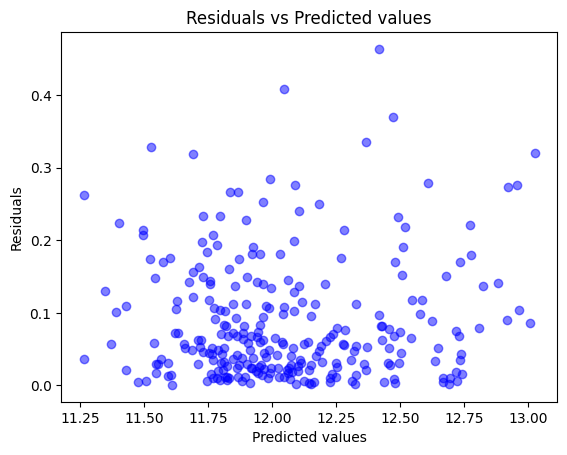

In [103]:
# plot the residuals vs the predicted values 
y_true = y_validation
y_pred = rf_train_pred
residuals = abs(y_true - y_pred)
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
#Matk the high residuals 
plt.scatter(y_pred[residuals > 0.5], residuals[residuals > 0.5], color="red", alpha=0.5) 
plt.show()

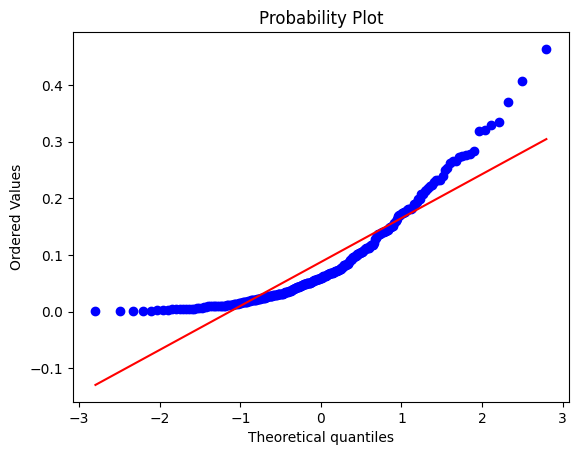

In [104]:
# QQ plot
import scipy.stats as stats
stats.probplot(residuals, dist="norm", plot=plt, fit=True)
plt.show()

In [105]:
# We have some outliers in the resuduals, we will try to remove them and implement the model again 

#Check the outliers
outliers = pd.DataFrame({"Id":X_validation.index, "Residuals":residuals})

#we will try to remove the outliers from the training set
outliers_to_remove = outliers.sort_values(by="Residuals", ascending=False).head(5).Id
#remove the outliers from the training set
X_train_outliers = X_train[~X_train.index.isin(outliers_to_remove)]
y_train__outliers = y_train[~y_train.index.isin(outliers_to_remove)]

# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=3000, max_depth=20)
rf.fit(X_train_outliers, y_train__outliers)
rf_train_pred = rf.predict(X_validation)
print("Random Forest RMSE: ", np.sqrt(mean_squared_error(y_validation, rf_train_pred)))
print("Random Forest R2: ", rf.score(X_validation, y_validation))

Random Forest RMSE:  0.12097365621012149

Random Forest R2:  0.9086933412416404

## Gradient Boosting - Regression (Ensemble Learning) 

Gradient Boosting is an ensemble learning method for classification and regression that operates by building an additive model in a forward stage-wise fashion.

The basic idea behind gradient boosting is to train weak models sequentially, where each model tries to correct the mistakes of the previous model. The process starts with a single model, that is fit to the training data. Then, the residual errors of this model are calculated and used to train the next model. 

This process is repeated several times, until a desired number of models have been combined, or some other stopping criteria have been met. The final prediction is made by combining the predictions of all the models in the ensemble.

There are several key parameters that need to be selected when using gradient boosting, including:

* Number of trees: This is the number of weak models that will be used in the final ensemble. A larger number of trees will typically result in better performance, but may also lead to overfitting.

* Learning rate: This is the step size that is used to update the residuals at each iteration. A smaller learning rate will result in slower convergence, but may also lead to a more accurate prediction.

* Depth of the trees: This is the maximum number of layers in each decision tree. Deeper trees can capture more complex relationships in the data, but may also lead to overfitting.

* Minimum samples per leaf: This is the minimum number of samples that are required to be in a leaf node of the decision tree. Larger values will result in smaller, simpler trees that are less prone to overfitting.

In order to choose the best values for these parameters, we used grid search to find the best combination of parameters for the model. 




In [106]:
# Gradient Boosting Regressor 
gb = GradientBoostingRegressor(learning_rate=0.01 ,n_estimators=4000, max_depth=2)
gb.fit(X_train, y_train)
gb_train_pred = gb.predict(X_validation)
print("Gradient Boosting RMSE: ", np.sqrt(mean_squared_error(y_validation, gb_train_pred)))
print("Gradient Boosting R2: ", gb.score(X_validation, y_validation))

Gradient Boosting RMSE:  0.11216555714908526

Gradient Boosting R2:  0.9215053832666684

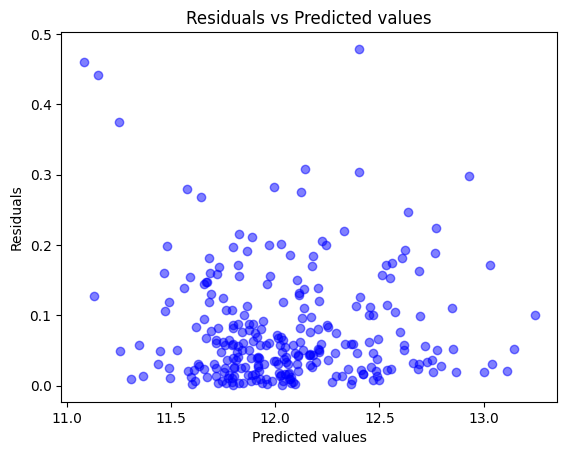

In [107]:
# plot the residuals vs the predicted values
y_true = y_validation
y_pred = gb_train_pred
residuals = abs(y_true - y_pred)
plt.scatter(y_pred, residuals, color="blue", alpha=0.5)
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted values")
#Matk the high residuals
plt.scatter(y_pred[residuals > 0.5], residuals[residuals > 0.5], color="red", alpha=0.5)
plt.show()

In [108]:
# #Grid Search for Gradient Boosting 
# param_grid = {"n_estimators": [2000, 2500, 3000], "max_depth": [2, 3, 4, 5, 10, 15, 20]}
# gb_grid = GridSearchCV(GradientBoostingRegressor(), param_grid, cv=5, scoring="neg_mean_squared_error")
# gb_grid.fit(X, y)
# print("Best parameters: ", gb_grid.best_params_)
# print("Best score: ", np.sqrt(-gb_grid.best_score_))

In [109]:
gb.fit(X, y)
gb_train_pred = gb.predict(X)
gb_test_pred = gb.predict(test_cleaned_normalized)

print(f"Gradient Boosting RMSE: {np.sqrt(mean_squared_error(y, gb_train_pred))}")


Gradient Boosting RMSE: 0.06306838395398086

## XGBoost - Regression (Ensemble Learning) 

Gradient Boosting is an ensemble learning method that combines the predictions of multiple weak models to produce a stronger model. 

XGBoost implements this method by using decision trees as its base model. The algorithm works by iteratively adding decision trees to the model, each tree correcting the mistakes of the previous trees.

XGBoost has several features that make it particularly powerful and efficient:

* Parallel processing: XGBoost supports parallel processing, which makes it faster than other gradient boosting algorithms.

* Regularization: XGBoost includes a regularization term, which helps to prevent overfitting.

* Handling missing values: XGBoost can handle missing values in the data, which is a common problem in real-world datasets.

* Feature selection: XGBoost includes feature selection algorithms that can help identify the most important features in the data.


In [110]:
# XGBoost Regressor
import xgboost as xgb

xgb = xgb.XGBRegressor(learning_rate=0.01,n_estimators=2000, max_depth=4)
xgb.fit(X_train, y_train)
xgb_train_pred = xgb.predict(X_validation)
print("XGBoost RMSE: ", np.sqrt(mean_squared_error(y_validation, xgb_train_pred)))

xgb.fit(X, y)
xgb_train_pred = xgb.predict(X)
xgb_test_pred = xgb.predict(test_cleaned_normalized)

print(f"XGBoost RMSE: {np.sqrt(mean_squared_error(y, xgb_train_pred))}")


XGBoost RMSE:  0.10703193209187917

XGBoost RMSE: 0.04520460036115126

## Stack of Models - Regression (Ensemble Learning)

Stacking is a machine learning ensemble technique that combines the predictions of multiple base models to produce a single, more accurate prediction. T
he basic idea behind stacking is to train a set of base models on the original dataset and use their predictions as input to a higher-level model, called the meta-model, which makes the final prediction.

By combining their predictions, stacking can leverage the strengths of each model and produce a more accurate prediction than any single model.

To perform stacking, the base models are trained on the original dataset and their predictions are combined into a new dataset, which is then used to train the meta-model.

In this particular case, we used the following base models: 

* Lasso Regression
* Elastic Net Regression 
* Random Forest
* Gradient Boosting




In [111]:
import lightgbm as lgb
import catboost as cb
import xgboost as xgb

In [112]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True).get_n_splits(X)
    rmse= np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [113]:

lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0001, random_state=1))

ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0001, l1_ratio=.9, random_state=3))


GBoost = GradientBoostingRegressor(n_estimators=2000, learning_rate=0.01,max_depth=2, max_features='sqrt',
                                    n_iter_no_change=50, tol=0.0001)

model_xgb = xgb.XGBRegressor(learning_rate=0.01, max_depth=2, n_estimators=2000, early_stopping_rounds=50)

model_lgb = lgb.LGBMRegressor(num_leaves=22, learning_rate=0.01, n_estimators=1000)

cat = cb.CatBoostRegressor(iterations=1500, learning_rate=0.01, depth=2, loss_function='RMSE', verbose=False)



In [115]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ridge)
print("Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


score = rmsle_cv(cat)
print("CatBoost score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))



Lasso score: 0.1152 (0.0168)

Ridge score: 0.1164 (0.0174)

ElasticNet score: 0.1155 (0.0168)

Gradient Boosting score: 0.1242 (0.0093)

[20:35:50] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:35:59] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:36:02] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some p

Xgboost score: 0.1206 (0.0111)

LGBM score: 0.1223 (0.0102)

CatBoost score: 0.1205 (0.0099)

In [117]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [126]:
# XGBoost

model_xgb.fit(X, y)
xgb_train_pred = model_xgb.predict(X)
xgb_pred = np.expm1(model_xgb.predict(test_cleaned_normalized))
print(rmsle(y, xgb_train_pred))

# LightGBM

model_lgb.fit(X, y)
lgb_train_pred = model_lgb.predict(X)
lgb_pred = np.expm1(model_lgb.predict(test_cleaned_normalized))
print(rmsle(y, lgb_train_pred))

#Ridge

ridge.fit(X, y)
ridge_train_pred = ridge.predict(X)
ridge_pred = np.expm1(ridge.predict(test_cleaned_normalized))
print(rmsle(y, ridge_train_pred))

#Lasso

lasso.fit(X, y)
lasso_train_pred = lasso.predict(X)
lasso_pred = np.expm1(lasso.predict(test_cleaned_normalized))
print(rmsle(y, lasso_train_pred))


[20:44:36] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




0.08231525499102707

0.047599131632613347

0.09156998651536119

0.09300517967647513